<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>
# Linear wave propagation 

### Examples - Fluid Mechanics 
<section class="post-meta">
By Sondre Duna Lundemo, Niels Henrik Aase, Thorvald M. Ballestad, Jenny Lunde, and Simen A. Å. Ellingsen
</section>
Last edited: October 13th, 2020

---

(This notebook is based on a problem given in the NTNU course TEP4105 - Fluid mechanics in the fall of 2019)

In this notebook, we will introduce some methods for analysing linear waves in infinite domains. In finite domains, <em>separation of variables</em> allows us to determine the natural modes of oscillation of the free fluid surface. Because of the linearity of the governing equations, any solution can be written as a superposition of such modes. In the infinite domain however, a general flow may be written as a superposition of harmonic waves. This creates an ideal environment for making use of the <em>Fourier transform</em>. 

In particular, we will consider the problem of finding the time evolution of an initial perturbation $\eta_0(x)$ of the surface of an inviscid and incompressible fluid at constant depth.

## Properties of the Fourier transform 

We present briefly some important properties of the Fourier transform which will be of use in this problem. 

Let $f$ be a sufficiently well behaved function. We define the Fourier transform $\widehat{f}$ by 

\begin{equation}
\widehat{f} (k) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} f(x) e^{-ikx} \, \text{d}x.
\end{equation}

### Inverse Fourier transform

The original function $f$ is obtain by using the inverse transform defined by

\begin{equation}
f(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} \widehat{f}(k) e^{ikx} \, \text{d}x.
\end{equation}

### Fourier transform of derivatives
As with the Laplace transform, the Fourier transform turns ordinary differential equations into algebraic equations, since derivatives with respect to $x$ are transformed into multiples of $ik$: 

\begin{equation}
\widehat{\frac{\text{d}^n f}{\text{d}x^n}} = \left(ik\right)^n \widehat{f}.
\end{equation}

## Governing equations for Stokes waves 

For small-amplitude, gravity-driven waves in an incompressible fluid we have the following governing equations for the velocity potential $\phi(x,y,t)$, and the free surface displacement $y = \eta(x,t)$ (see appendix for derivations).

\begin{align}
	\frac{\partial^2\phi}{\partial x^2} + \frac{\partial^2\phi}{\partial y^2} = 0& \quad \quad ; \quad \quad y < 0 \\
	\frac{\partial\phi}{\partial y} = \frac{\partial \eta}{\partial t}, \quad \frac{\partial \phi}{\partial t} + g\eta = 0& \quad \quad ;\quad \quad y = 0 \\
	\frac{\partial \phi}{\partial y} = 0& \quad \quad ; \quad \quad y = -h
\end{align}

where $h$ is the mean water depth, and $g$ the acceleration of gravity. The first equation represents the continutiy equation for an incompressible fluid, namely $\mathbf{\nabla} \cdot \mathbf{v} = 0$, which translates to $\nabla^2\phi = 0$ for the velocity potential, in the case of irrotational flow. The two following equations are the kinematic and dynamic boundary conditions, and the last one is the impermeability at the bottom. We specify the initial conditions of the free fluid surface, and assume for simplicity that the surface is initially at rest

$$
	\eta(x,0) = \eta_0(x), \quad \frac{\partial\eta}{\partial t} = 0.
$$

We take a Fourier transform of the above equations with respect to $x$. This yields the following

\begin{align}
\frac{\partial^2 \widehat{\phi}}{\partial y^2} - k^2 \widehat{\phi} = 0& \quad \quad ; \quad \quad y < 0 \\
\frac{\partial \widehat{\phi}}{\partial y} = \frac{\partial \widehat{\eta}}{\partial t}, \quad \frac{\partial \widehat{\phi}}{\partial t} + g\widehat{\eta} = 0& \quad \quad ;\quad \quad y = 0 \\
\frac{\partial \widehat{\phi}}{\partial y} = 0& \quad \quad ; \quad \quad y = -h \\
\widehat{\eta} = \widehat{\eta_0}, \quad \frac{\partial \widehat{\eta}}{\partial t} = 0& \quad \quad ; \quad \quad t = 0 
\end{align}

The solutions of the first equation is a linear combination of exponentials, which together with the impermeability condition in the third equation yields

\begin{equation}
	\widehat{\phi} = A(k,t) \cosh{ \left(k ( y + h)\right)},
\end{equation}

where the amplitude may depend on $k$ and $t$. From the second equation, the amplitude satisfies

\begin{equation}\label{eq:a1}
	Ak \sinh{kh}  = \frac{\partial \widehat{\eta}}{\partial t}
\end{equation} 

and

\begin{equation}\label{eq:a2}
	\frac{\partial A}{\partial t}\cosh{kh} + g\widehat{\eta} = 0.
\end{equation}

By differentiating equation \eqref{eq:a1} with respect to time, we get $\frac{\partial A}{\partial t} k \sinh{kh} = \frac{\partial^2\widehat{\eta}}{\partial t^2}$, which we can insert into equation \eqref{eq:a2} to get

$$
	\frac{\partial^2\widehat{\eta}}{\partial t^2} + gk \tanh{kh} \cdot \widehat{\eta}  = 0.
$$

This is the equation of simple harmonic motion. Upon applying the initial conditions, we obtain an expression for $\widehat{\eta}$

\begin{equation}
	\widehat{\eta} = \widehat{\eta_0} \cos{\omega t}
\end{equation}

where $$\omega(k) = \sqrt{gk \tanh{kh}}$$ is the dispersion relation. The time evolution of the free fluid surface is obtained by applying the Fourier inversion theorem,

\begin{equation}\label{eq:eta}
	\eta(x,t) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} \widehat{\eta_0}(k) \cos{\left(\omega(k) t\right)} e^{ikx} \, \text{d}k.
\end{equation}

Unfortunately, finding an exact and explicit expression for $\eta(x,t)$ is hard, even for simple dispersion relations $\omega(k)$. In fact, solving this numerically is not entirely straightforward either, since it essentially involves solving two integrals over infinite domains. 
We need to solve both the integral in equation \eqref{eq:eta}, and the integral defining $\widehat{\eta_0}(k)$.
To this end, we will present some approaches to obtain $\eta(x,t)$ numerically and analytically. We restrict our attention to a Gaussian initial perturbation $\eta_0(x) = a \exp{\left(- x^2 /2L^2 \right)}$.

## Gaussian perturbation

For the initial shape of the free fluid surface being $\eta_0(x) = a \exp\left(-x^2/2L^2\right)$ we get away with solving only <em>one</em> of the integrals, since $\widehat{\eta_0}$ can be calculated. 

\begin{equation}
	\widehat{\eta_0}(k) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} a \exp{\left(-\frac{x^2}{2L^2}\right)} \exp{(ikx)} \, \text{d} x = aL \exp{\left(-\frac{k^2L^2}{2}\right)}.
\end{equation}

If we insert this into equation \eqref{eq:eta} we get

\begin{equation}\label{eq:eta2}
	\eta(x,t) = \int_{-\infty}^{\infty} \frac{\text{d}k}{\sqrt{2\pi}} aL\exp{\left(-\frac{k^2L^2}{2}\right)} \cos{\omega(k) t}\exp{(ikx)}.
\end{equation}

When dealing with this expression, it is useful to introduce dimensionless quantities to represent $x$ and $t$. A natural time scale of this system is $\sqrt{L/g}$ and a useful length scale is $\sqrt{2}L$. This allows us to define the following dimensionless quantities 

\begin{equation}
\xi = \frac{x}{\sqrt{2}L} \quad ; \quad \tau = \frac{t}{\sqrt{L/g}}
\end{equation}

In [1]:
# Importing useful packages

import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib import rc
import matplotlib.gridspec as gridspec

eps = np.finfo(float).eps  # Machine decimal rounding

# Setting common plotting parameters
fontsize = 22
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (13, 7), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
             'legend.handlelength': 1.5, 'figure.titlesize': fontsize,
             'figure.dpi':200, 'text.usetex': True, 'font.family': 'sans-serif'}
plt.rcParams.update(newparams)

In [2]:
# Physical constants 

g = 10    # Acceleration of gravity

global h  # Making h global so we can change it afterwards easily
h = 10    # Depth of water

a = 1     # Initial height of gaussian perturbation

global L  # Making L global so we can change it afterwards easily
L = 0.5   # Initial width of gaussian

t_0 = np.sqrt(L/g)  # Time scale
x_0 = np.sqrt(2)*L  # Length scale in x-direction

In [3]:
def plot_waves(X,Y,title,labels):
    """
    Function for plotting waves.
    
    Args:
        X (np.array)      : x-values for wave
        Y (np.array)      : y-values for wave. Each row represents one wave.
        title (string)    : title of plot
        labels (np.array) : array of labels corresponding to each wave
    """
    
    fig = plt.figure()
    plt.title(title)
    
    for i in range(Y.shape[0]):
        plt.plot(X,Y[i,:],label = labels[i])
    
    plt.xlabel(r"$\xi = \frac{x}{\sqrt{2}L}$")
    plt.ylabel(r"$y / a$")

    plt.grid(linestyle="--")

    plt.tight_layout()
    plt.legend()

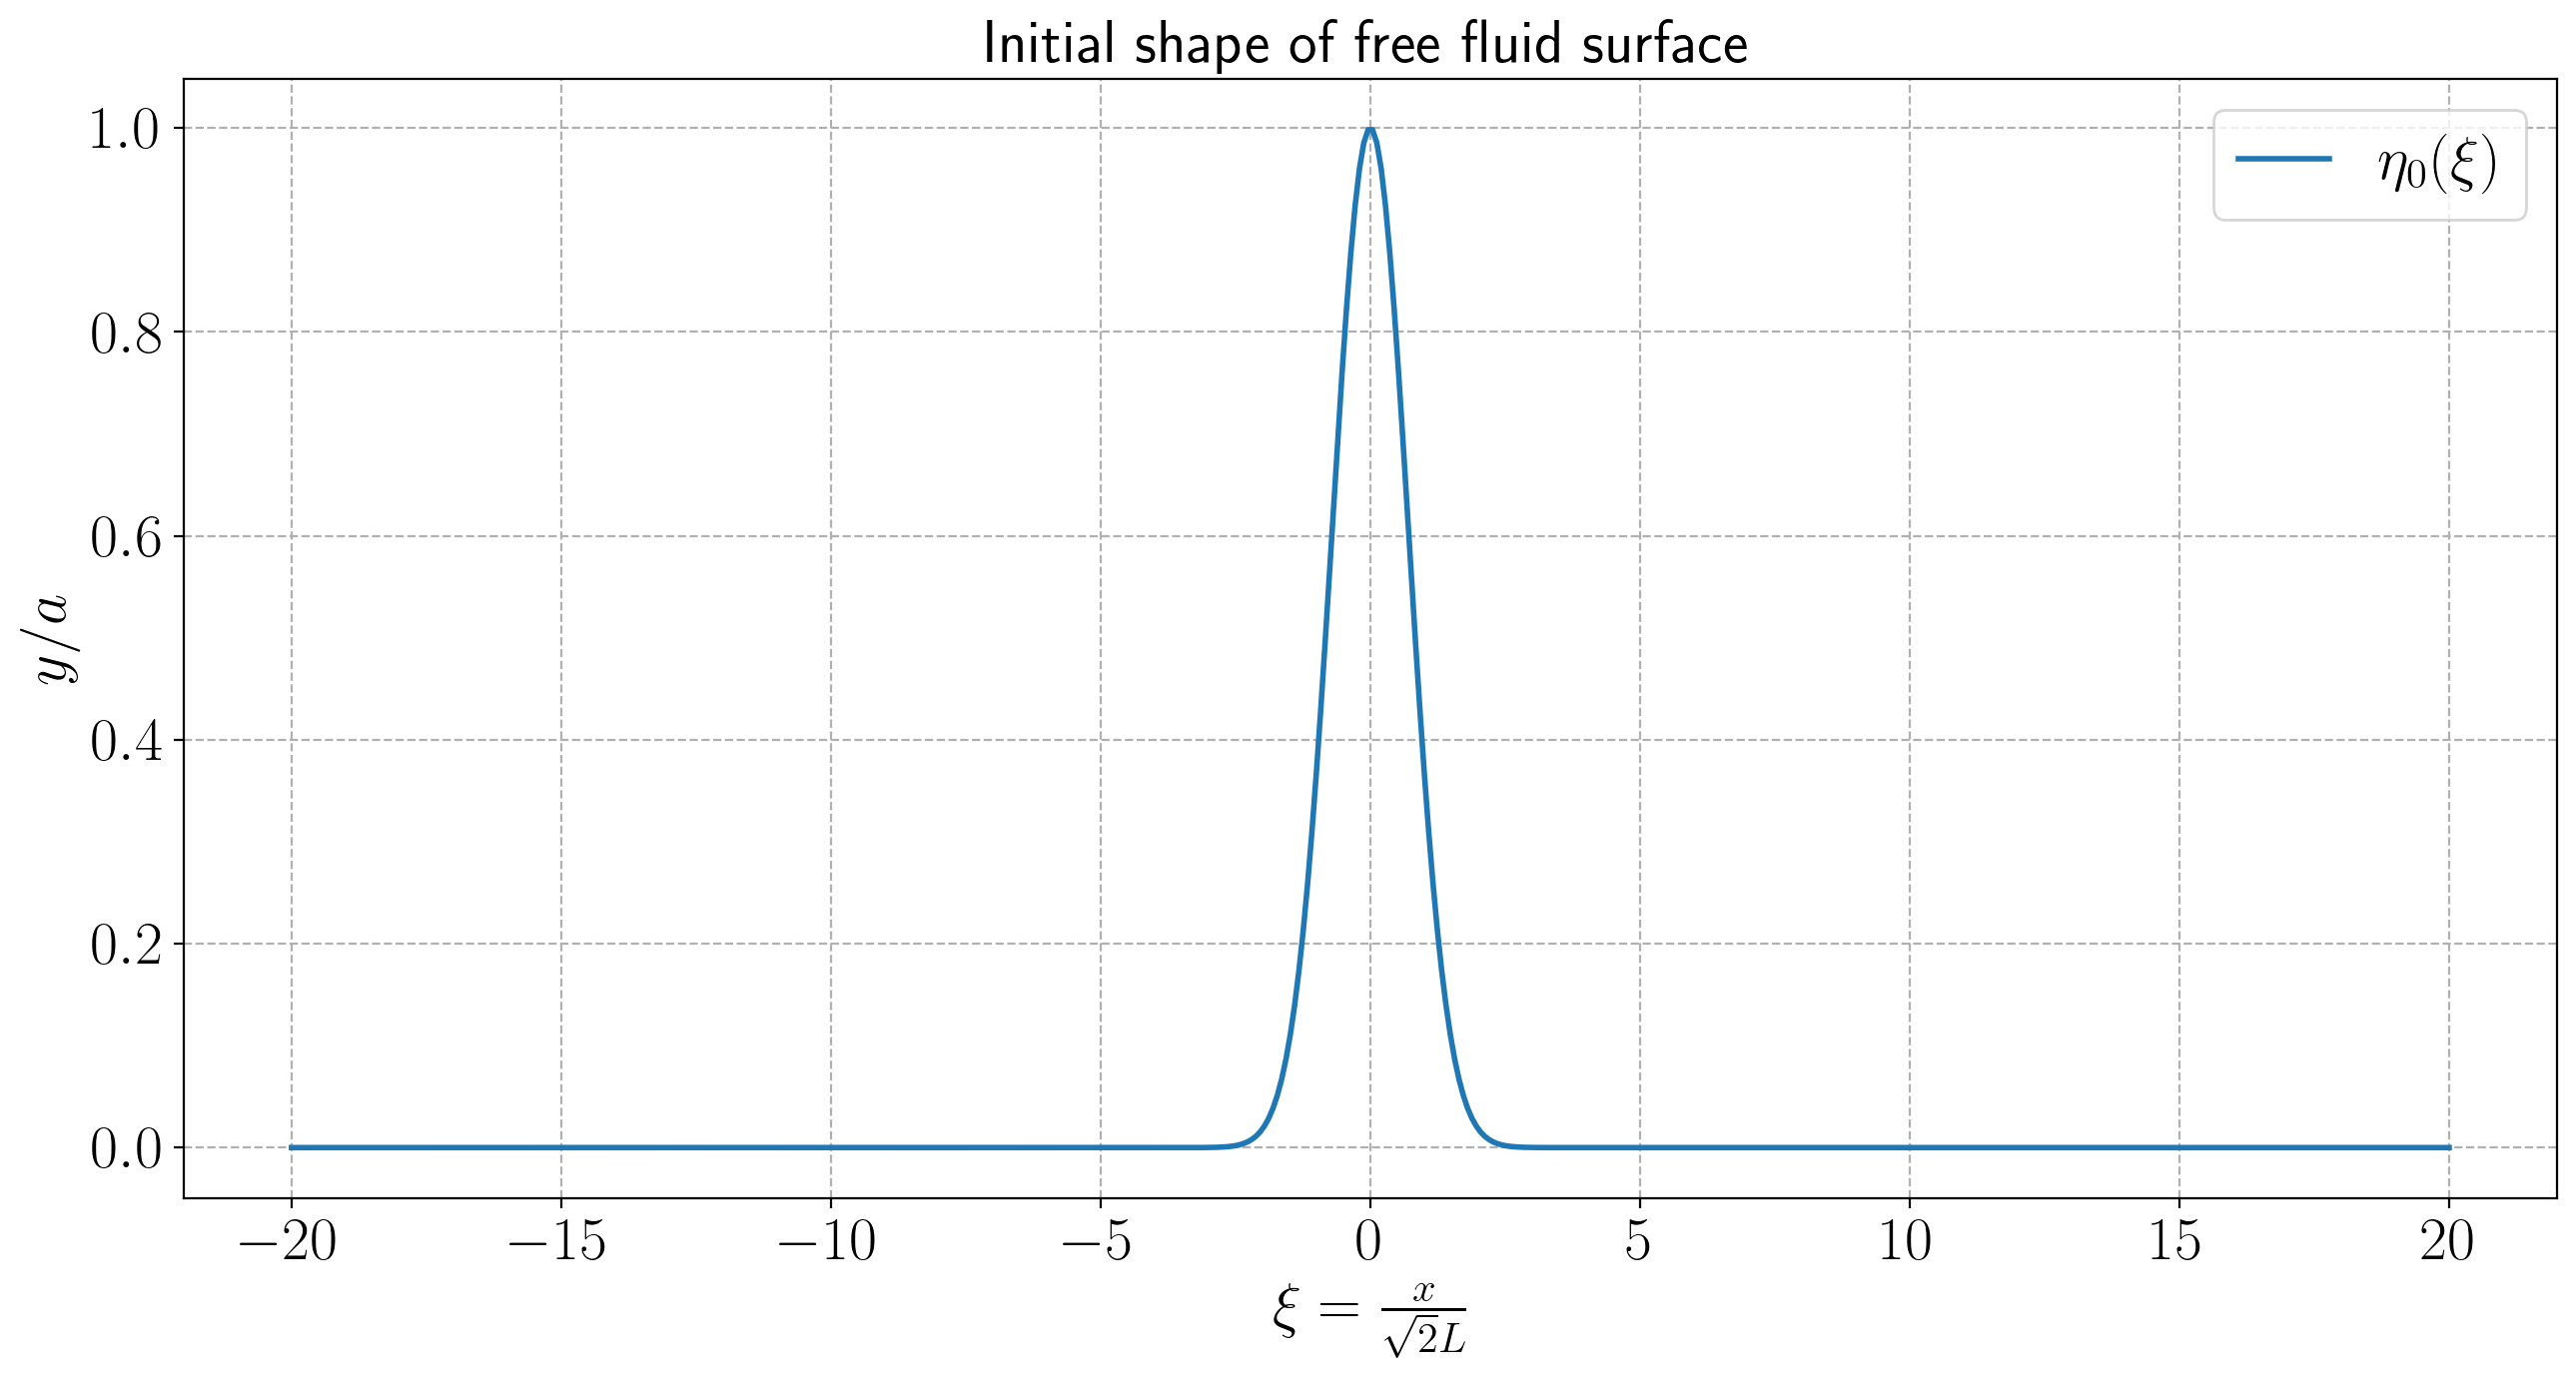

In [4]:
def f(xi):
    """
    Initial gaussian disturbance.
    
    """
    return np.exp(-xi**2)

X = np.linspace(-20,20,500)
plot_waves(X,np.array([f(X)]),title = r"Initial shape of free fluid surface", labels = [r"$\eta_0(\xi)$"])

## Changing the bounds on the integral

Since the infinite integration domain is difficult to deal with numerically, we might try to replace $\infty$ in the bounds by some large number, say $M$. After all, when we are dealing with a sharply localised initial wave, the integrand has to decay rather quickly, and the error made from introducing such restriction should therefore be small when the wave packet is sufficiently localised (ie. at short times after the perturbation occurred). In this context we have chosen to use $M = 50$ with $500$ panels on the trapezoid approximation. 
For more information on this algorithm, consult this [this notebook](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/numerical_integration.ipynb). 


In [5]:
global M
M = 50

In [6]:
# The decorator @np.vectorize vectorizes the function so that it can take as 
# argument a nested sequence of objects or numpy arrays as inputs and returns a single numpy array
# for the documentation, see: https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html

@np.vectorize
def comp_trap(f,a,b,N = 500):
    """
    Simple implementation of the trapezoid rule.
    
    Args:
        f (function) : integrand
        a (float)    : start point
        b (float)    : end point
        N (int)      : number of intervals, default = 500
    
    Returns:
        I (float)    : trapezoid integral approximation
        
    """
    I = 0
    delta_x = (b-a)/N
    for i in range(N):
        I += 0.5*delta_x*(f(a+delta_x*i)+f(a+delta_x*(i+1))) 
    return I

In [7]:
def omega_grav(k):
    """
    Function for gravity wave dispersion relation, omega(k)
    
    """
    return np.sqrt(g*k*np.tanh(k*h))

In [8]:
def eta_crude(xi,tau,N = 500,omega = omega_grav):
    """
    Function for determining eta(xi,tau) using the crude 
    trapezoid approximation with the upper bounds changed from infinity to M 
    
    Args:
        xi (float)       : xi-value(s)
        tau (float)      : tau-value 
        N (int)          : number of intervals to use in trapezoid approx, default = 500
        omega (function) : dispersion relation, default = omega_grav
        
    Returns:
        eta(xi,tau)
    """
    prefac = L /(np.sqrt(2*np.pi))
    
    def integrand(k):
        return prefac * np.exp(-k**2*L**2/2)*np.cos(omega(k)*tau*t_0)*np.exp(1j*k*xi*x_0)
    
    return comp_trap(integrand,-M,M,N = N)

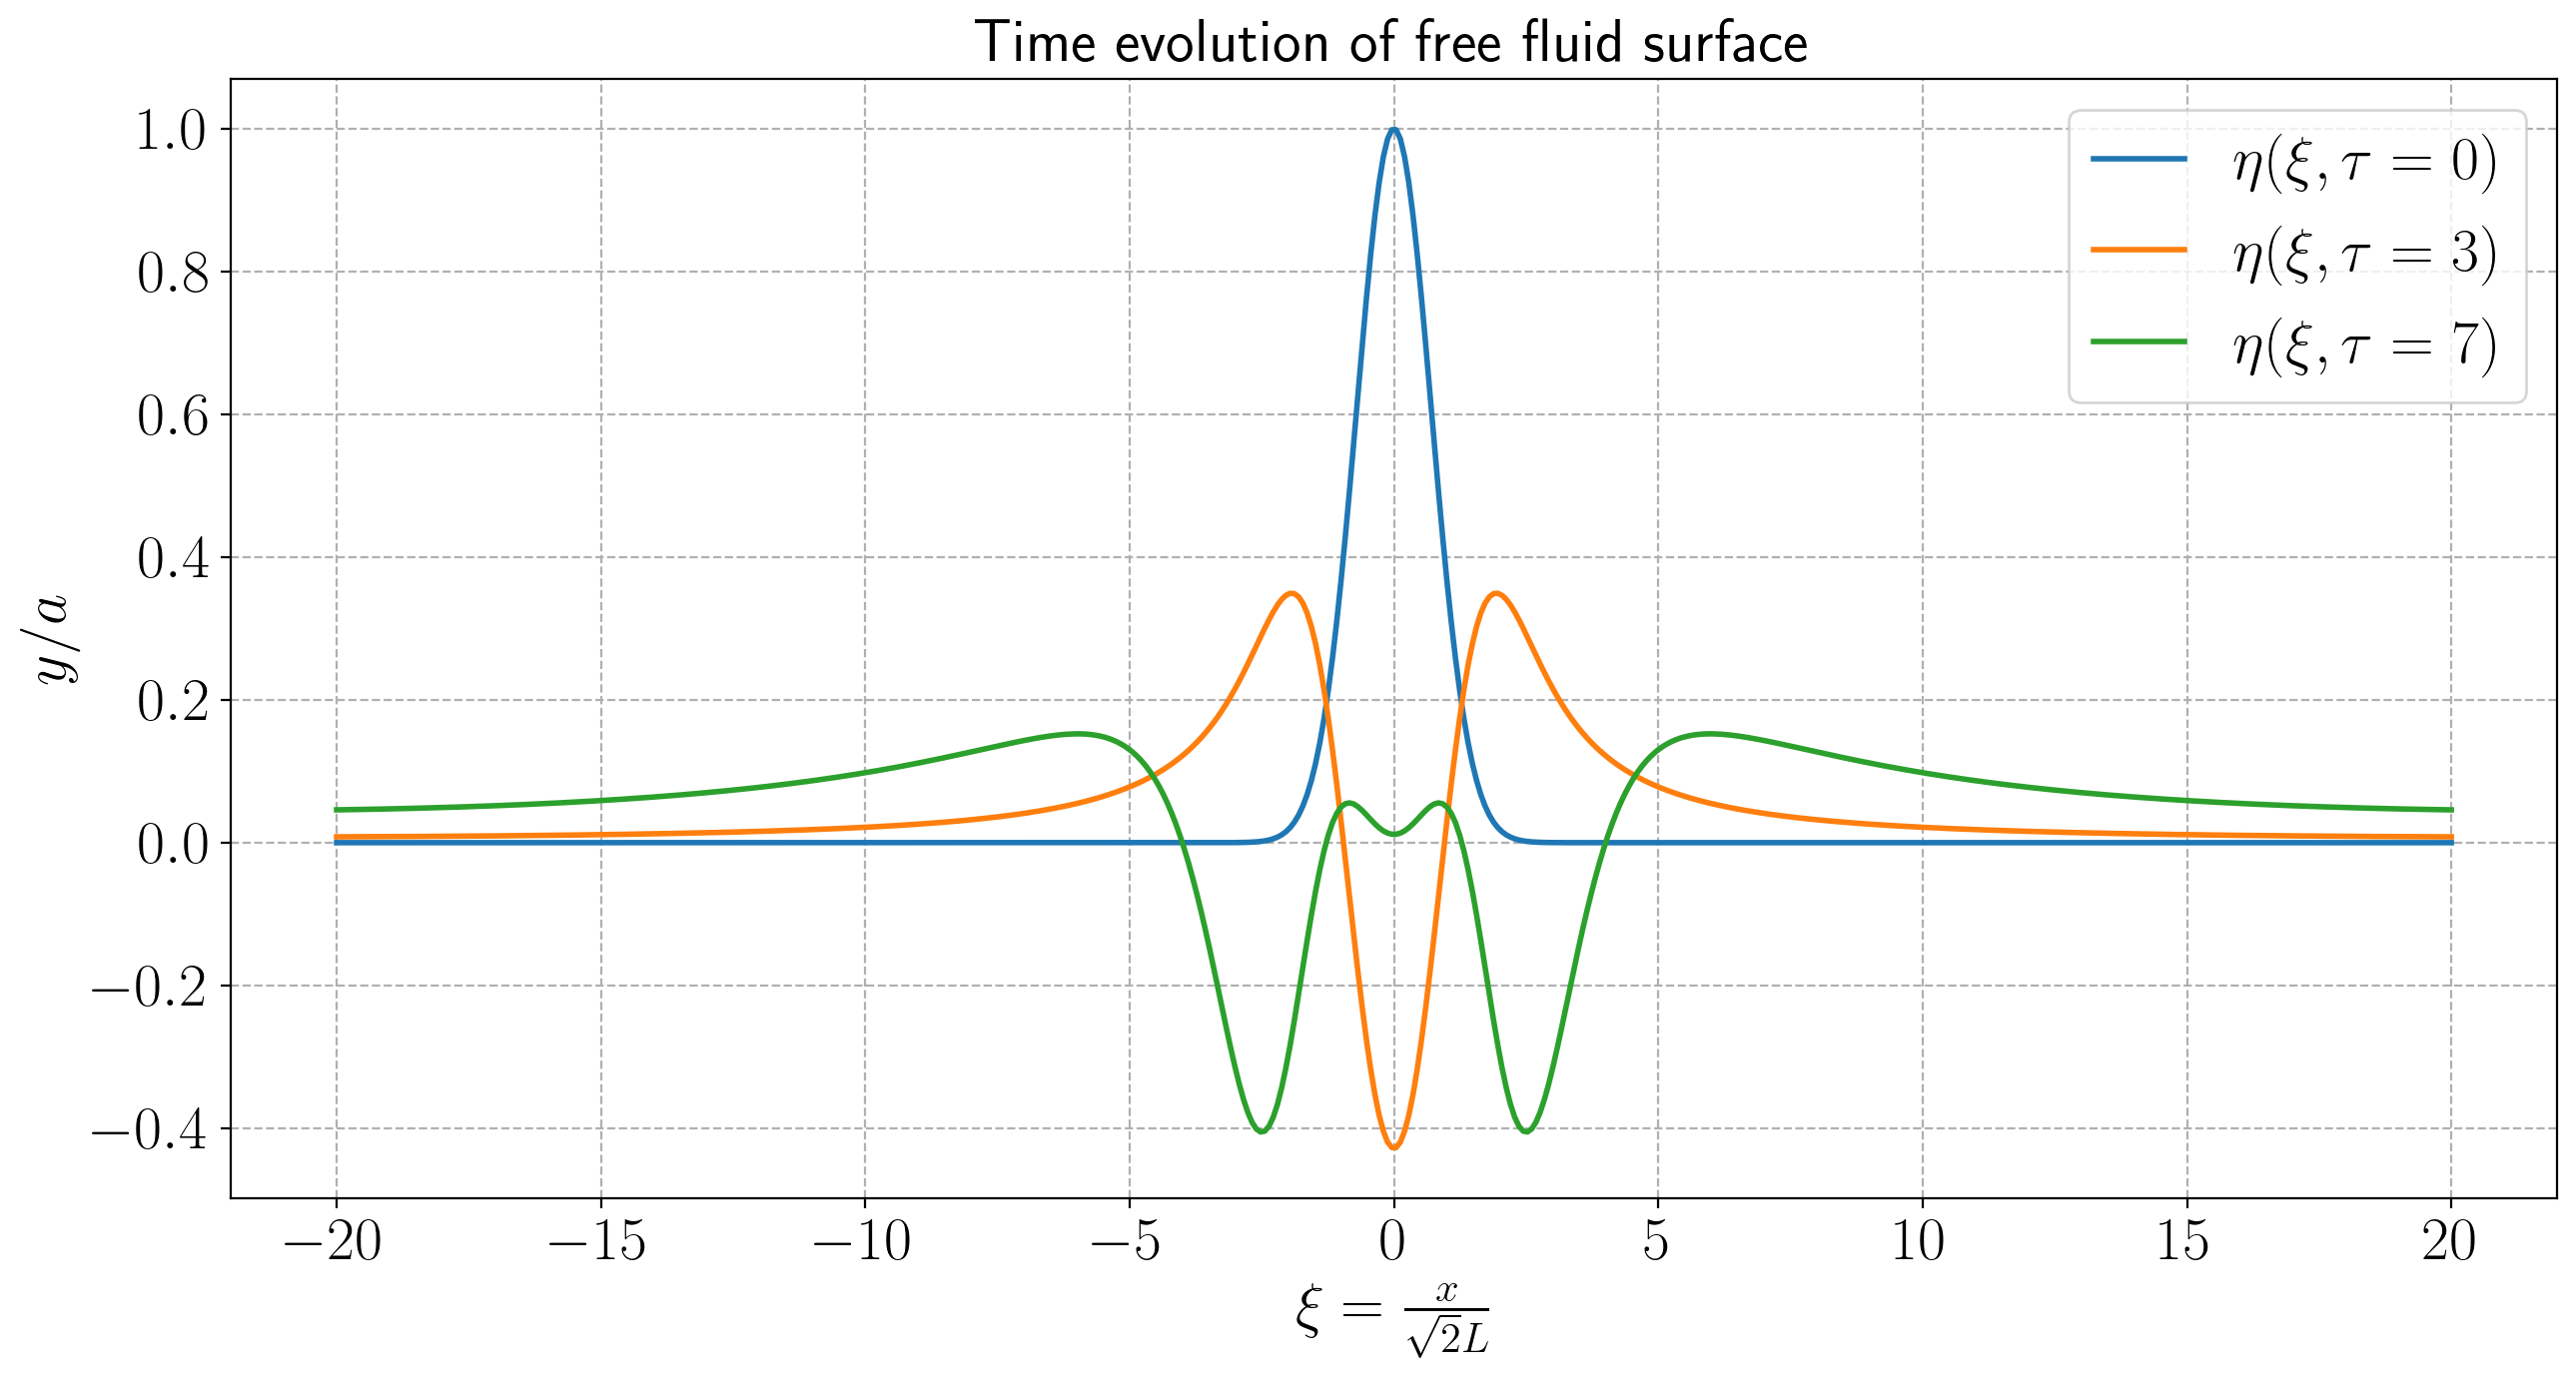

In [9]:
Y1 = eta_crude(X,0)
Y2 = eta_crude(X,3)
Y3 = eta_crude(X,7)

Y = np.array([np.real(Y1),np.real(Y2),np.real(Y3)])

plot_waves(X, Y,title = r"Time evolution of free fluid surface",
           labels = [r"$\eta(\xi,\tau = 0)$",r"$\eta(\xi,\tau = 3)$",r"$\eta(\xi,\tau = 7)$"])

To save some time, we include one method of doing the crude trapezoid approximation using more of the functionality offered by $\texttt{NumPy}$. To write the `comp_trap`-function using the $\texttt{Numpy}$ approach, one could do something similar to what is shown in the function `comp_trap_numpy` in the cell below. However, since we want to be able to call the function $\eta$ on an array of $\xi$-values, we have to rewrite the entire function, since the broadcasting features of $\texttt{NumPy}$ don't do what we intend in this context. The natural structure for solving this problem in $\texttt{NumPy}$ is meshgrids, see eg. [this notebook](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/NumpyIntermediate.ipynb#Meshgrid.) for a detailed overview. The simple test below indeed confirmes that this method is faster, and we will therefore use this method when dealing with the composed trapezoid rule.

In [10]:
def comp_trap_numpy(f, a, b, N=500):
    """This function is not used! 
    It is an example of how one could write comp_trap using NumPy.
    However, simply swapping comp_trap with comp_trap_numpy in eta_crude
    does not work, as NumPy broadcasting does not do what we intend it to in this context.
    Thus, one has to rewrite eta_crude as well.
    """
    x, dx = np.linspace(a, b, N, retstep=True)
    I = dx * (np.sum(f(x)) - 0.5*f(x[0]) - 0.5*f(x[-1]))
    return I

In [11]:
def eta_crude_numpy(xi,tau, N = 500, omega = omega_grav):
    """
    Function for determining eta(xi,tau) using the crude 
    trapezoid approximation with the upper bounds changed from infinity to M,
    using more of the functionality provided by NumPy.
    
    Args:
        xi (float)       : xi-value(s)
        tau (float)      : tau-value 
        N (int)          : number of intervals to use in trapezoid approx, default = 500
        omega (function) : dispersion relation, default = omega_grav
        
    Returns:
        eta(xi,tau)
    """
    prefac = L /(np.sqrt(2*np.pi))
    
    def integrand(k):
        return prefac * np.exp(-k**2*L**2/2)*np.cos(omega(k)*tau*t_0)*np.exp(1j*k*xi*x_0)
    
    k, dk = np.linspace(-M,M,N,retstep = True)
    
    xixi, kk = np.meshgrid(xi,k)
    integrand_mesh = integrand(kk)
    
    I = dk * (np.sum(integrand_mesh, axis=0) - 0.5*integrand_mesh[0, :] - 0.5*integrand_mesh[-1, :])
    
    return I

In [12]:
# We use the timeit module to measure the execution times.
%timeit eta_crude(X, 0)
%timeit eta_crude_numpy(X, 0)

189 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
43.8 ms ± 2.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Transforming the integral to a finite domain

Another approach to deal with the infinite domain is to introduce a change of variables, say $\zeta(k)$ such that $\zeta(\pm\infty)$ is finite. There are many choices for such a mapping, but lets try $\zeta (k) = \tanh(k)$ to begin with. Then $\text{d}\zeta = (1- \tanh^2k)\,\text{d}k = (1-\zeta^2)\,\text{d}k$ and $\zeta (k = \pm\infty) = \pm 1$. This turns the expression for the free fluid surface at a time $t$ into 

\begin{equation*}
	\eta(x,t) = \int_{-1}^{1} \frac{\text{d}\zeta}{\sqrt{2\pi}} \frac{aL}{1-\zeta^2} \exp{\left(- \frac{\text{artanh}^2(\zeta)L^2}{2}\right)} \cos{\left(\omega(\text{artanh }(\zeta))t\right)} \exp{\left(i\text{artanh}(\zeta)x\right)}.
\end{equation*}

When doing this integral numerically, it is obvious that we will have to avoid $\zeta = \pm 1$. 
We achieve this by changing our integration interval to $\zeta \in [-1 + 2 \epsilon, 1 - 2\epsilon]$, where $\epsilon$ is the machine epsilon.

In [13]:
def eta_exact(xi,tau,N = 500, omega = omega_grav):
    """
    Function for determining eta(xi,tau) using the 'exact' method of  
    mapping the coordinates to [-1,1], and then using trapezoid method to calculate integral
    
    Args:
        xi (float)       : xi-value(s)
        tau (float)      : tau-value 
        N (int)          : number of intervals to use in trapezoid approx, default = 500
        omega (function) : dispersion relation, default = omega_grav
        
    Returns:
        eta(xi,tau)
    """
    def integrand(zeta):
        return L/(np.sqrt(2*np.pi)) * 1/(1-zeta**2) * np.cos(omega(np.arctanh(zeta))*tau*t_0) * np.exp(- np.arctanh(zeta)**2 * L**2 /2 + 1j * xi * x_0 * np.arctanh(zeta)) 
    
    # We add machine epsilon, `eps`, to avoid the endpoints xi = +-1.
    k, dk = np.linspace(-1 + 2*eps,1-2*eps,N,retstep = True)
    
    xixi, kk = np.meshgrid(xi,k)
    integrand_mesh = integrand(kk)
    
    I = dk * (np.sum(integrand_mesh, axis=0) - 0.5*integrand_mesh[0, :] - 0.5*integrand_mesh[-1, :])
    
    return I

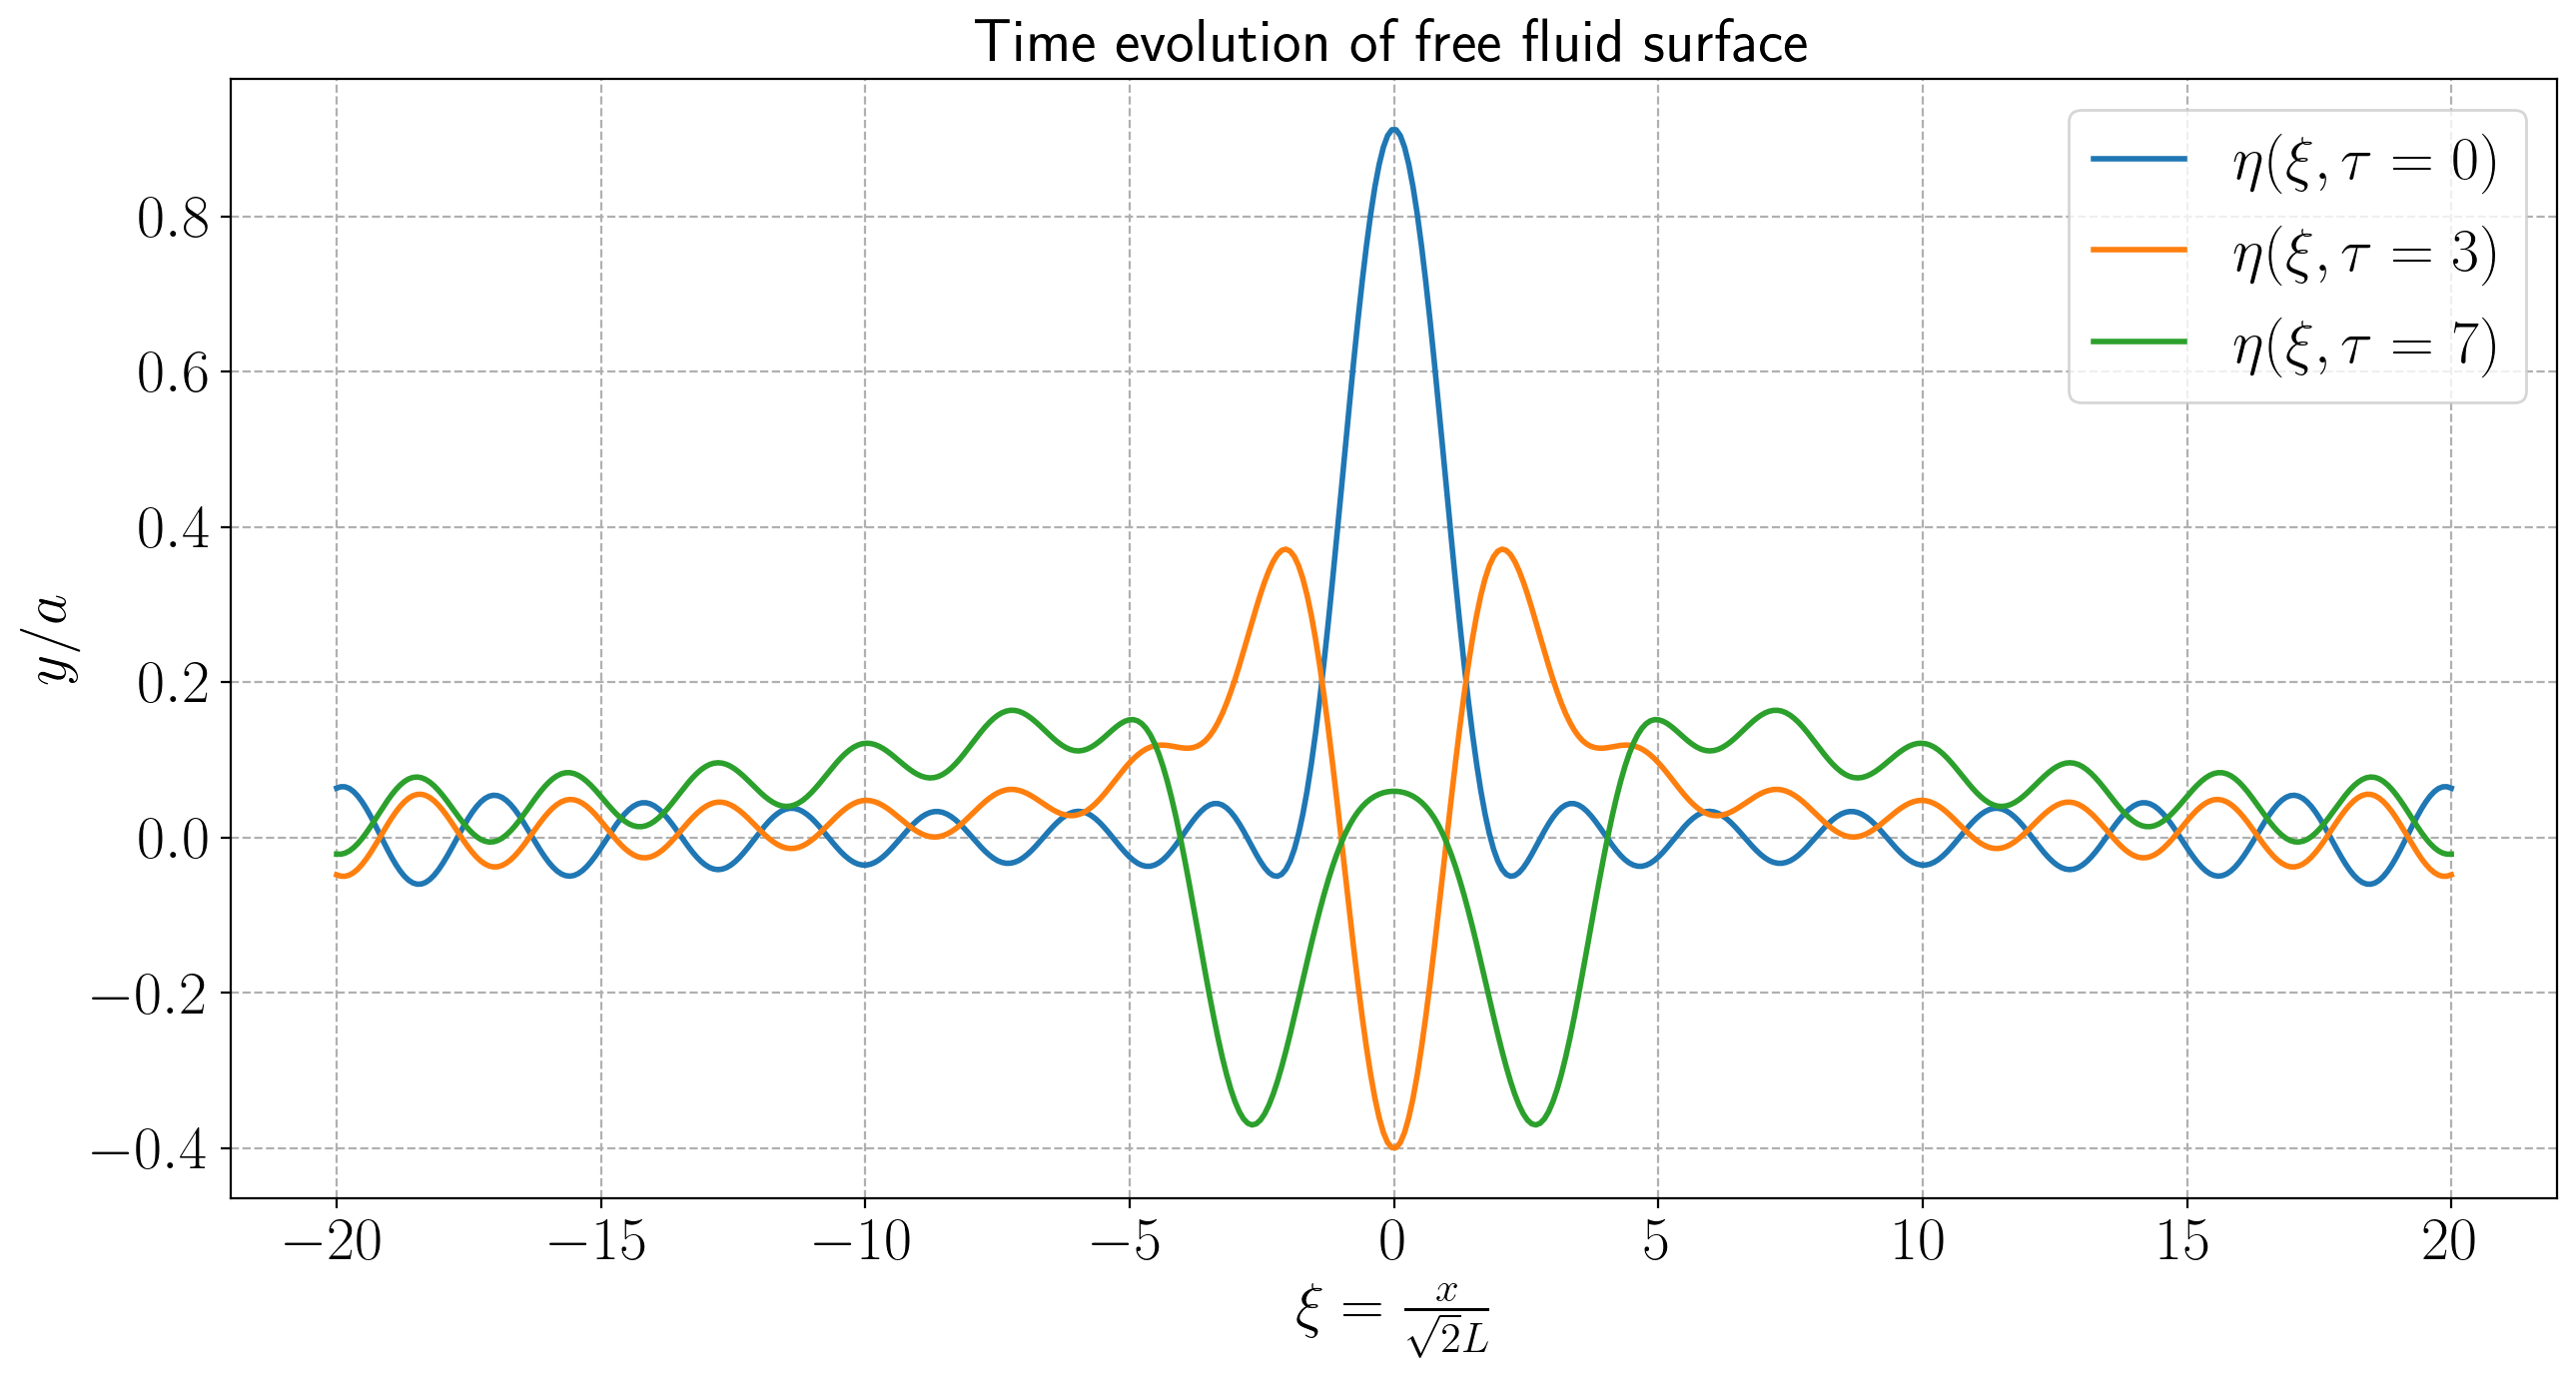

In [14]:
Y1 = eta_exact(X,0)
Y2 = eta_exact(X,3)
Y3 = eta_exact(X,7)

Ys = np.array([np.real(Y1),np.real(Y2),np.real(Y3)])

plot_waves(X, Ys,title = r"Time evolution of free fluid surface",
           labels = [r"$\eta(\xi,\tau = 0)$",r"$\eta(\xi,\tau = 3)$",r"$\eta(\xi,\tau = 7)$"])

When using exactly the same, naive trapezoid rule on this integral, we clearly see that this produces results that are very unsatisfactory. For small $\xi$, the results are ok, but get worse as $\xi$ increases. By plotting the integrand at (say) $\tau = 3$ for some different $\xi$, we can get an idea what this is caused by.

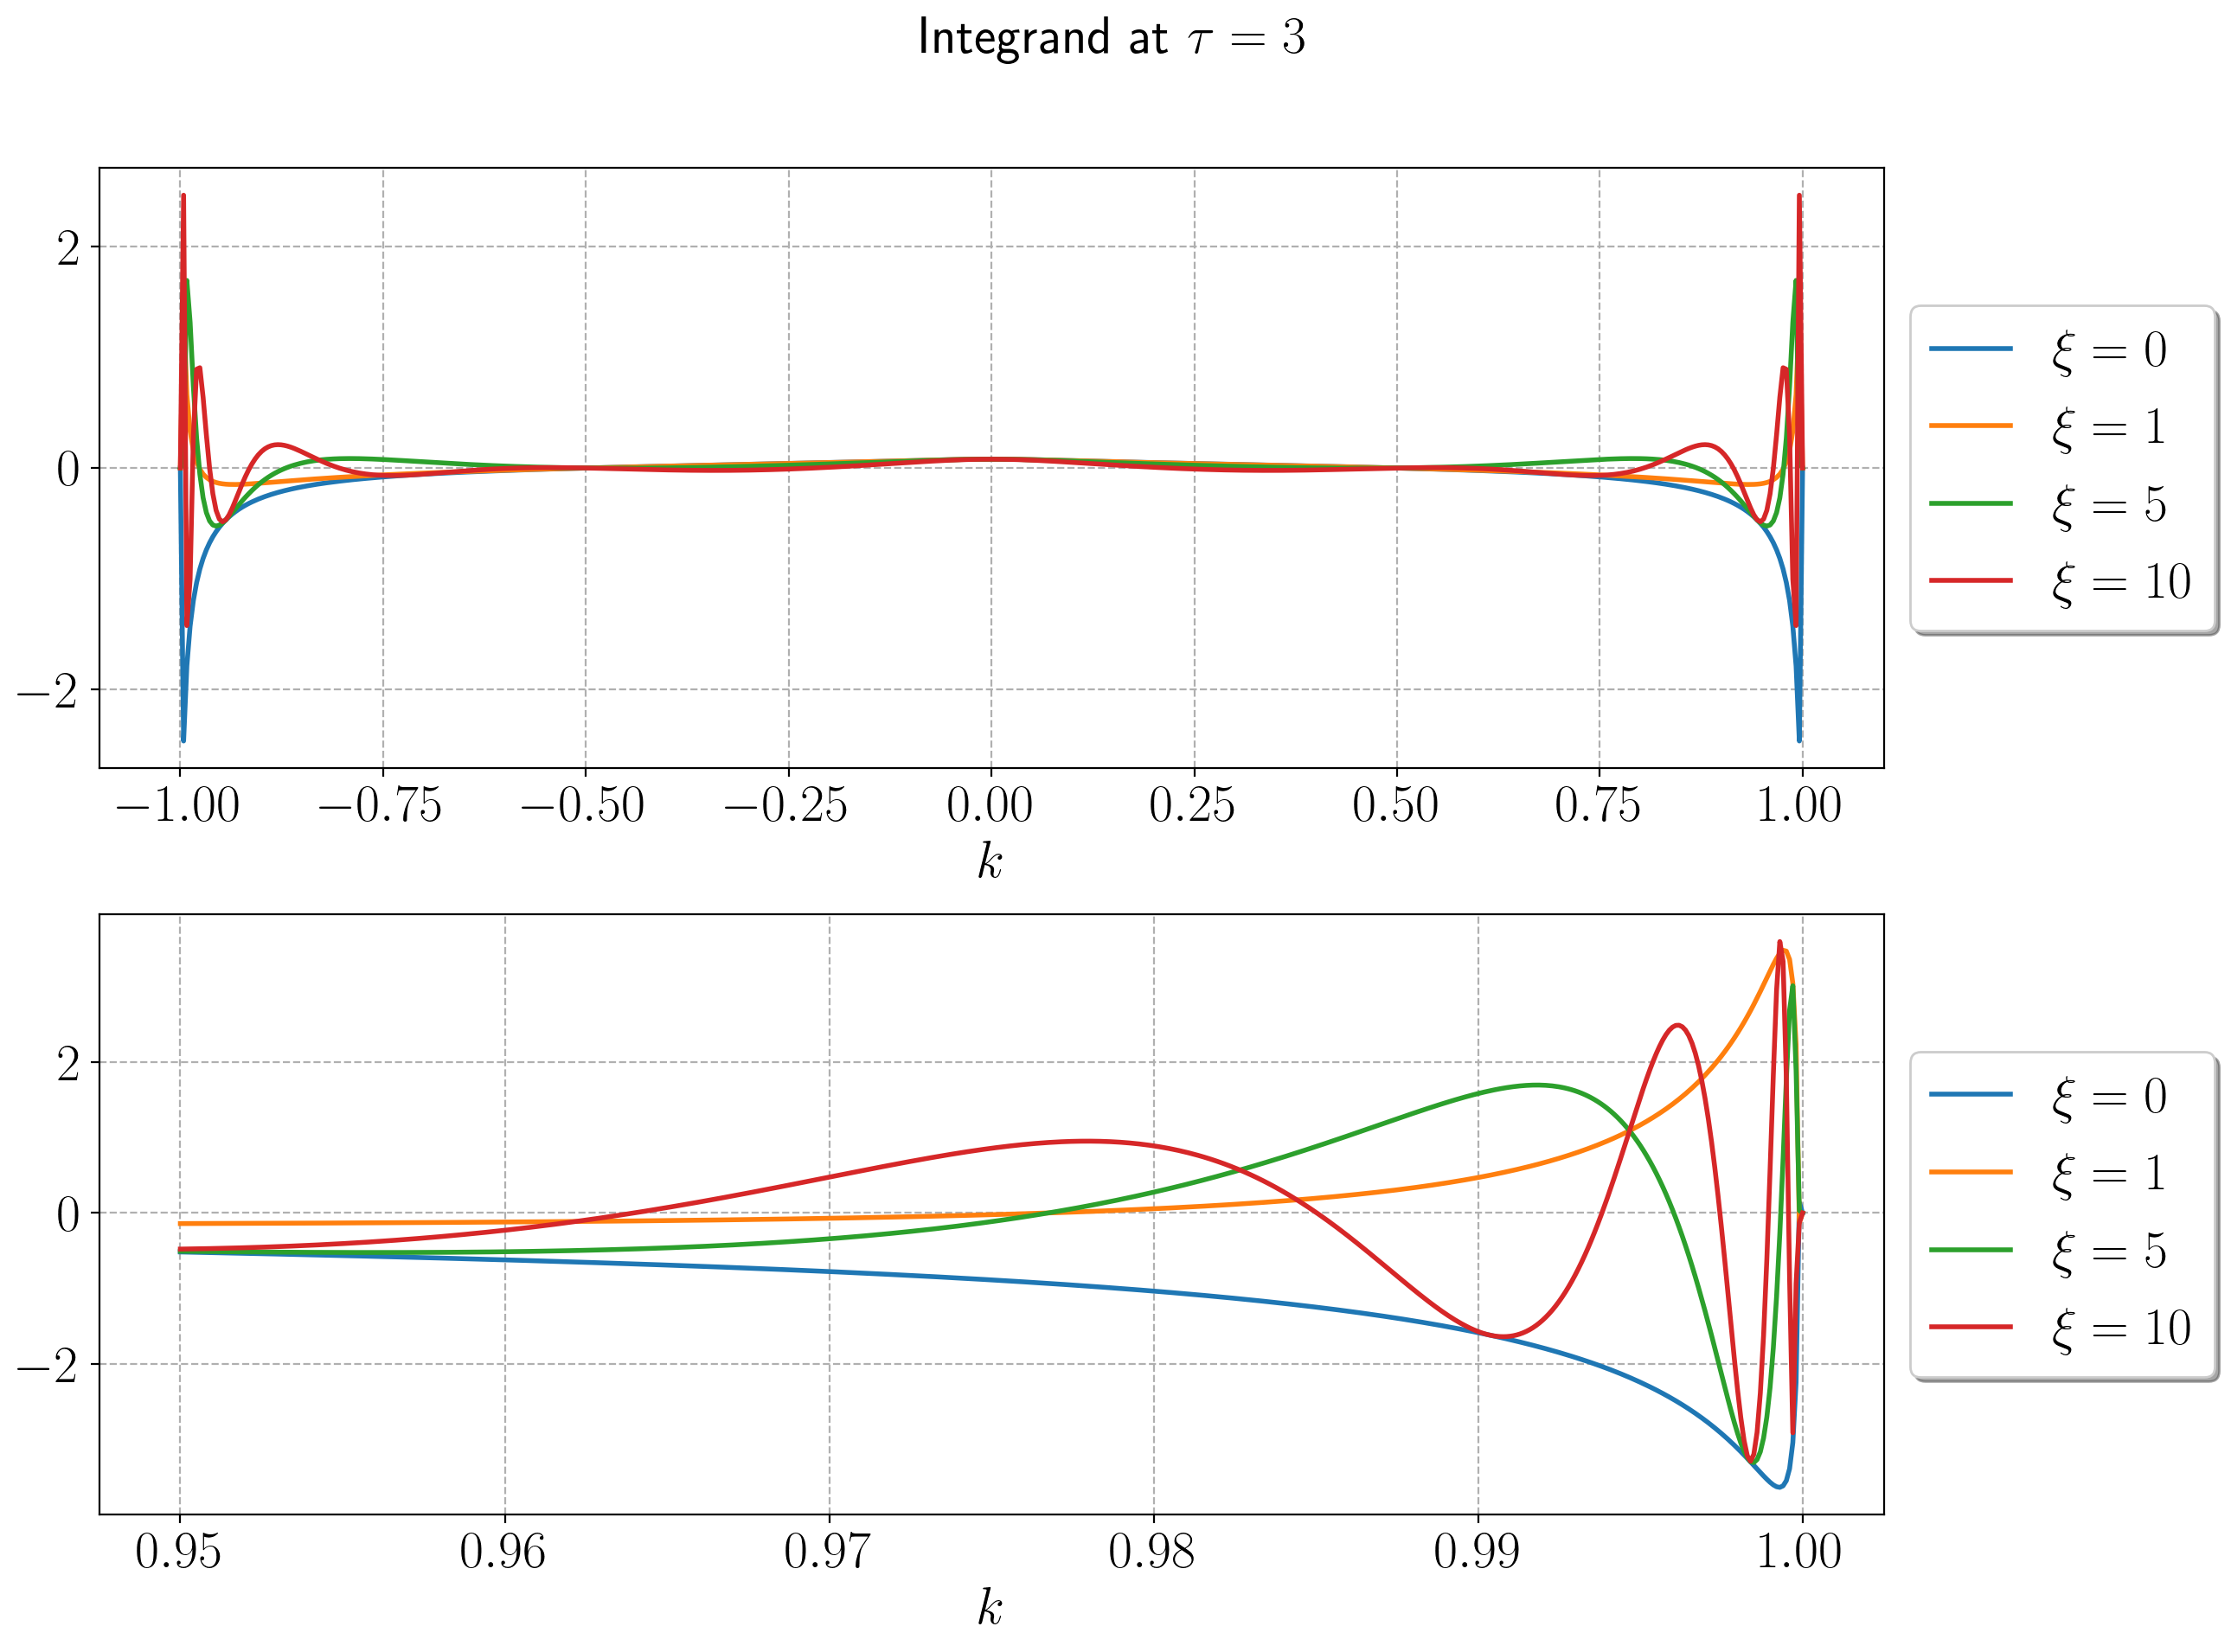

In [15]:
def integrand(zeta,xi,tau):
    return L/(2*np.pi) * 1/(1-zeta**2) * np.cos(omega_grav(np.arctanh(zeta))*tau*t_0) * np.exp(- np.arctanh(zeta)**2 * L**2 /2 + 1j * xi * x_0 * np.arctanh(zeta))
    
Z1 = np.linspace(0.95,1 - eps,500)    # array of zeta values between 0.95 and 1-eps 
Z2 = np.linspace(-1+ eps,1 - eps,500) # array of zeta values between -1 + eps and 1 + eps

# Integrand evaluated at different \xi values on the short interval

I1_short = integrand(Z1,0,3)
I2_short = integrand(Z1,1,3)
I3_short = integrand(Z1,5,3)
I4_short = integrand(Z1,10,3)

# Integrand evaluated at different \xi values on the large interval

I1 = integrand(Z2,0,3)
I2 = integrand(Z2,1,3)
I3 = integrand(Z2,5,3)
I4 = integrand(Z2,10,3)

fig = plt.figure(figsize=(13,10))

fig.suptitle(r"Integrand at $\tau = 3$")

gs = gridspec.GridSpec(2,1) # Making a 2 x 1 grid

ax = plt.subplot(gs[0,:])   # First axis is the first row

ax.plot(Z2,np.real(I1),label = r"$\xi = 0$")
ax.plot(Z2,np.real(I2),label = r"$\xi = 1$")
ax.plot(Z2,np.real(I3),label = r"$\xi = 5$")
ax.plot(Z2,np.real(I4),label = r"$\xi = 10$")

plt.xlabel(r"$k$")
plt.grid(linestyle="--")

# Placing legend outside plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True, shadow=True)

ax = plt.subplot(gs[1,:])    # Second axis is the second row

ax.plot(Z1,np.real(I1_short),label = r"$\xi = 0$")
ax.plot(Z1,np.real(I2_short),label = r"$\xi = 1$")
ax.plot(Z1,np.real(I3_short),label = r"$\xi = 5$")
ax.plot(Z1,np.real(I4_short),label = r"$\xi = 10$")

# Placing legend outside plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True, shadow=True)

plt.xlabel(r"$k$")
plt.grid(linestyle="--")

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # tight_layout adjusted to work with suptitle

The integrand varies very rapidly near $\pm 1$ for increasing $x$, and it therefore becomes hard to accurately integrate it with equidistant integration abscissae. We can try to resolve this problem by not using uniformly distributed integration points, but rather let more of them be situated near $\pm 1$. Alternatively, we can choose our coordinate mapping more cleverly, which allows us to convert the problem into one of calculating a Fourier series. This is what we will consider in the following.

### Fourier - Chebyshev quadrature

Another way to map the coordinates to a finite interval is to consider a transformation of the form $k = \chi(\theta) =  J \cot{\theta}$, effectively transforming our integration interval to $[0,\pi]$. This can be seen from the fact that $\chi'(\theta) = -J \frac{1}{\sin^2(\theta)}$, and that $\chi(\theta = \pi) = -\infty$ and $\chi(\theta = 0) = \infty$. It follows that 
\begin{equation*}
	\eta(\xi,\tau) = \int_{-\infty}^{\infty} f (k;\xi,\tau)\, \text{d}k = J \int_{0}^{\pi} \text{d}\theta \frac{f(J \cot{\theta};\xi,\tau)}{\sin^2{\theta}},
\end{equation*}

where $J$ is a user-defined constant. One advantage associated to mapping it onto $[0,\pi]$ is that it is straightforward to compute the integral of sines and cosines on this interval. Therefore, we try to expand the integrand in its Fourier series and then integrate it. The idea is the following (see eg. [[1]](#fourier_quad)):

We want to calculate the integral 

\begin{equation}\label{eq:int}
I = \int_{0}^{\pi} f[\chi(\theta)] \chi'(\theta) \, \text{d}\theta,
\end{equation}

where $\chi$ is the function that maps our interval $[-\infty,\infty]$ to $[0,\pi]$. In our case, we choose $\chi(\theta) = J \cot{\theta}$. Notice that since this function actually maps the upper bound ($+ \infty$) to $0$ and the lower bound to $\pi$ but in addition carries a minus sign in the derivative, the above notation $\chi'(\theta)$ is somewhat abusive since it disregards the minus sign in the derivative.

Suppose we approximate the integrand $f(\chi(\theta))$ by its truncated Fourier series expansion through trigonometric interpolation, that is 

\begin{equation}\label{eq:trig_interpolate}
q(\theta) = a_0 + \sum_{n=1}^N a_n \cos{n \theta} + \sum_{n=1}^{N} b_n \sin{n \theta},
\end{equation}

where $N$ is some appropriately chosen cut-off point.

Now suppose we combine the trigonometric basis functions into new cardinal functions $C_j$ for each interpolation point $t_j$ with the property that

\begin{equation}\label{eq:cardinal_funcs}
C_j(t_i) = \begin{cases} 
1, i = j\\
0, i \neq j
\end{cases}.
\end{equation}

The explicit form of these cardinal functions can be found in the appendix.
When inserted into equation \eqref{eq:trig_interpolate}, this yields

$$
q(\theta) = \sum_{j=0}^{N-1} q(t_j) C_j(\theta).
$$

The last step is to integrate $q(\theta)$ to approximate the integral we are interested in solving in \eqref{eq:int},

$$
I \approx \sum_{j=0}^{N-1} w_j f (\chi(t_j)),
$$
where the weights $w_j$ are defined as
$$
w_j = \chi'(t_j) \int_{0}^{\pi} C_j(\theta)\, \text{d}\theta.
$$

When using the mapping $k \mapsto J \cot{\theta}$, one can calculate the weights, $w_j$ , and the approximation for $N$ interpolation points reads

\begin{equation*}
    \eta(\xi,\tau) \approx \frac{J\pi}{N-1} \sum_{n = 1}^{N-2} \frac{f(J \cot{(\pi n/(N-1))};\xi,\tau)}{\sin^2{(n\pi/(N-1))}} + \frac{J\pi}{2N-2} \left( \frac{f(J \cot{(0)};\xi,\tau)}{\sin^2{(0)}} + \frac{f(J \cot{(\pi)};\xi,\tau)}{\sin^2{(\pi)}} \right),
\end{equation*}

where we assume the two last terms in the parantheses are finite. The derivation of these formulae can be found in the article referred to in [[1]](#fourier_quad), and some details are presented in the appendix. To avoid division by $0$-issues, we evaluate $\sin$ and $\cot$ at $\epsilon$ and $\pi - \epsilon$ instead of $0$ and $\pi$, where $\epsilon$ is the machine limit for decimal rounding.

In [16]:
def eta_exact_good(xi,tau,J = 10 ,N = 500,omega = omega_grav):
    """
    Function for determining eta(xi,tau) using the Fourier chebyshev method,
    with coordinate mapping k = J cot (theta) in the integral.
    
    Args:
        xi (float)       : xi-value(s)
        tau (float)      : tau-value 
        n (int)          : number of intervals to use in trapezoid approx, default = 500
        omega (function) : dispersion relation, default = omega_grav
        
    Returns:
        eta(xi,tau)
    """
    prefac = L /(np.sqrt(2*np.pi))
    
    def integrand(k):
        return prefac * np.exp(-k**2*L**2/2)*np.cos(omega(k)*tau*t_0)*np.exp(1j*k*xi*x_0)
    
    S1 = sum(J*np.pi/(N-1) * integrand(J*1/np.tan(n*np.pi/(N-1)))*1/(np.sin(n*np.pi/(N-1))**2) for n in range(1,N-1))
    S2 = J*np.pi/(2*N-2)*integrand(J*1/np.tan(eps))*1/((np.sin(eps))**2)
    S3 = J*np.pi/(2*N-2)*integrand(J*1/np.tan(np.pi - eps))*1/((np.sin(np.pi - eps))**2)
    
    return S1 + S2 + S3
    

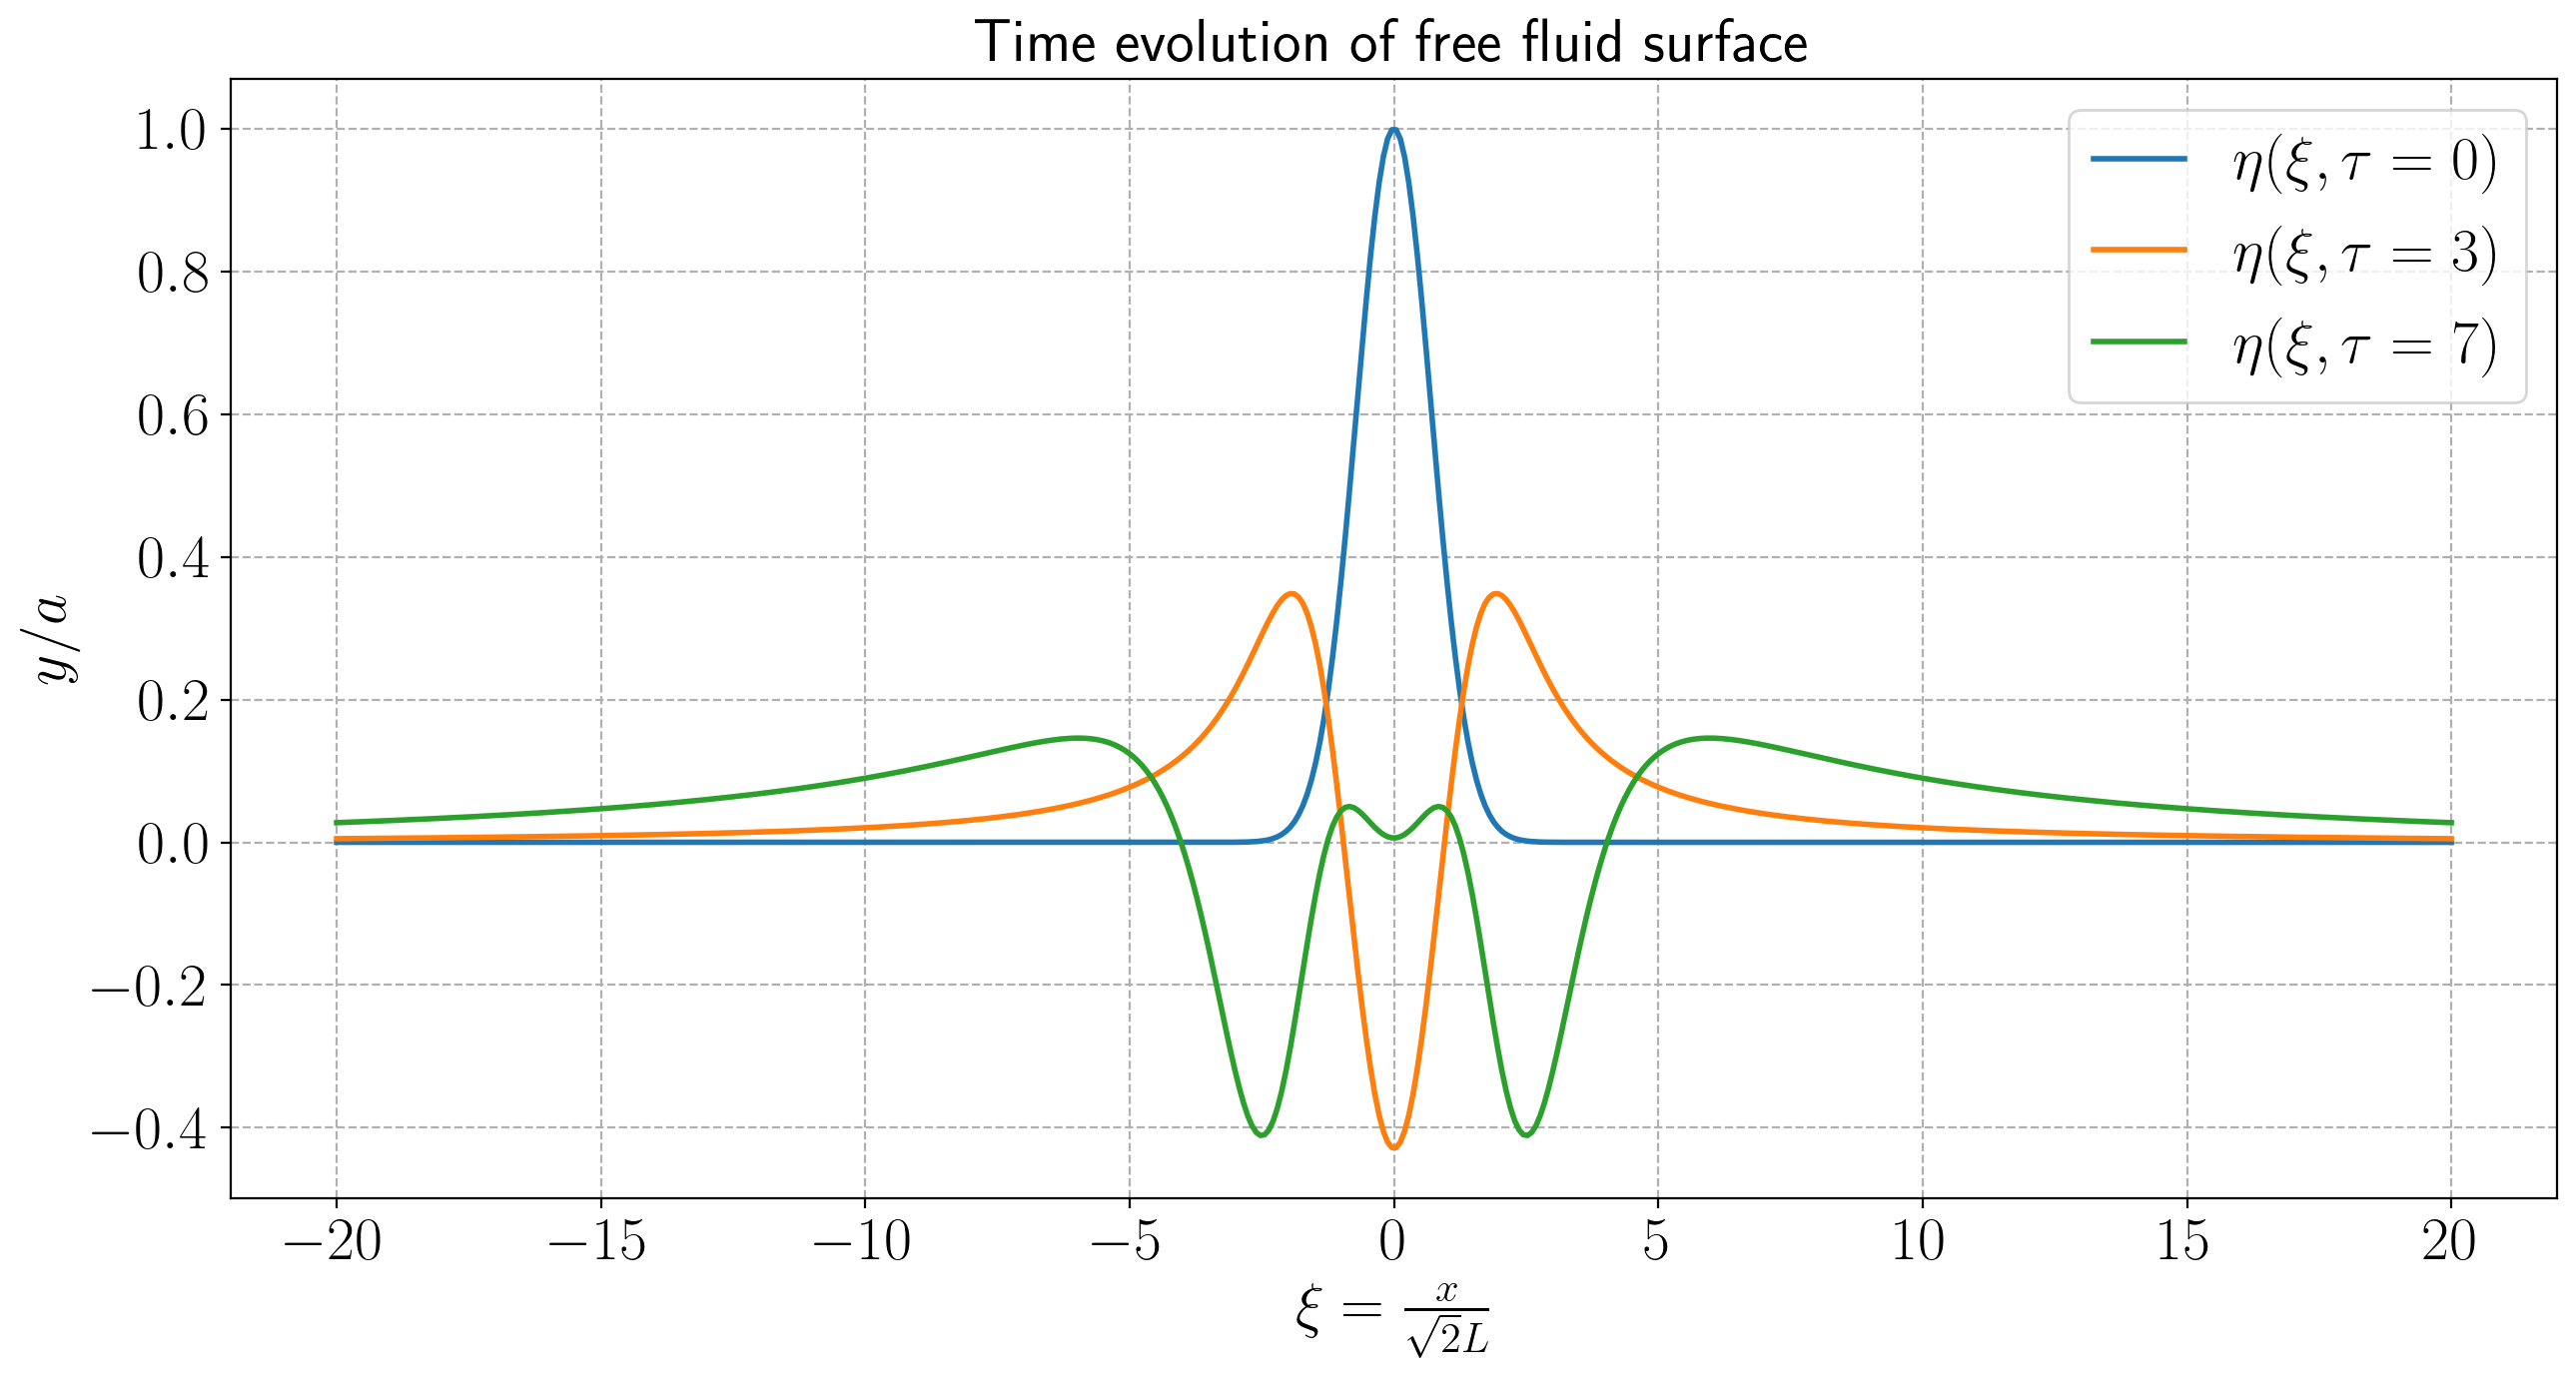

In [17]:
Y1 = eta_exact_good(X,0)
Y2 = eta_exact_good(X,3)
Y3 = eta_exact_good(X,7)

Ys = np.array([np.real(Y1),np.real(Y2),np.real(Y3)])

plot_waves(X,Ys,title = r"Time evolution of free fluid surface",
           labels = [r"$\eta(\xi,\tau = 0)$",r"$\eta(\xi,\tau = 3)$",r"$\eta(\xi,\tau = 7)$"])

Judging from the plot, this produces very good results within this domain. The user-defined constant $J$ in the coordinate mapping can of course be varied. In fact, the optimal value of $J$ is problem dependent, and can be approximated by usual optimisation techniques. We present a simple method of choosing the best $J$ from a given array of values below.

In this method we use the trapezoid approximation with a large number of panels as the "correct" reference value to compare the Fourier-chebyshev method with. Essentially, we are seeking the value of $J$ for which the Fourier-chebyshev method with $500$ panels is the closest to this reference value. 


In [18]:
def search_optimal_J(Js,Xis,tau,omega = omega_grav):
    """
    Function for finding the J-value in a given array
    which gives the smallest deviation between the 'brute-force'
    method of calculating eta, and the Fourier chebychev integration.
    
    Args:
        Js (np.array)     : array of J-values to search through
        Xis (np.array)    : the xi-values to evaluate eta over
        tau (float)       : the time to evaluate eta at
        omega (function)  : dispersion relation, default = gravity wave
        
    Returns:
        best_J (float)    : J giving smallest deviation
        err (float)       : smallest deviation obtained
        J_stats (np.array): 2d array with all the Js and their corresponding error
        
    """
    
    
    correct_eta = eta_crude_numpy(Xis,tau,N=5000,omega=omega_grav)
    
    best_J = Js[0]
    eta_0 = eta_exact_good(Xis,tau,J = best_J, N = 500, omega = omega_grav)
    err = np.linalg.norm(correct_eta - eta_0)
    
    n = Js.size
    J_stats = np.zeros((n,2))
    J_stats[:,0] = Js
    
    for index, J in enumerate(Js):
        new_eta = eta_exact_good(Xis,tau,J=J,N = 500, omega = omega_grav)
        new_err = np.linalg.norm(new_eta - correct_eta)
        if new_err < err:
            err = new_err
            best_J = J
            
        J_stats[index,1] = new_err
            
    return best_J, err, J_stats

In [19]:
J = np.linspace(0.01,100,500)
best_J,best_diff, stats = search_optimal_J(J,X,3)

In [20]:
print("Best J: ", best_J)
print("Error at best J: ", best_diff)

Best J:  4.4183767535070135
Error at best J:  1.472755463560216e-14


Since we see that choosing an appropriate value of $J$ makes the deviation from the reference value very small, the Fourier-Chebyshev method is obviously way better than the naive trapezoid method in this context. To see this explicitly, compare the time spent on doing the crude approximation with $5000$ panels and the Fourier-Chebyshev integral with $500$ interpolation points:

In [21]:
%timeit eta_crude_numpy(X,0,N=5000,omega=omega_grav)
%timeit eta_exact_good(X,0,J = best_J,N = 500,omega=omega_grav)

637 ms ± 18.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
72.6 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


We include a plot of the error as a function of the constant $J$ in the coordinate mapping, showing that choosing the right $J$ is in fact cruicial for this method to be better than the normal trapezoid.

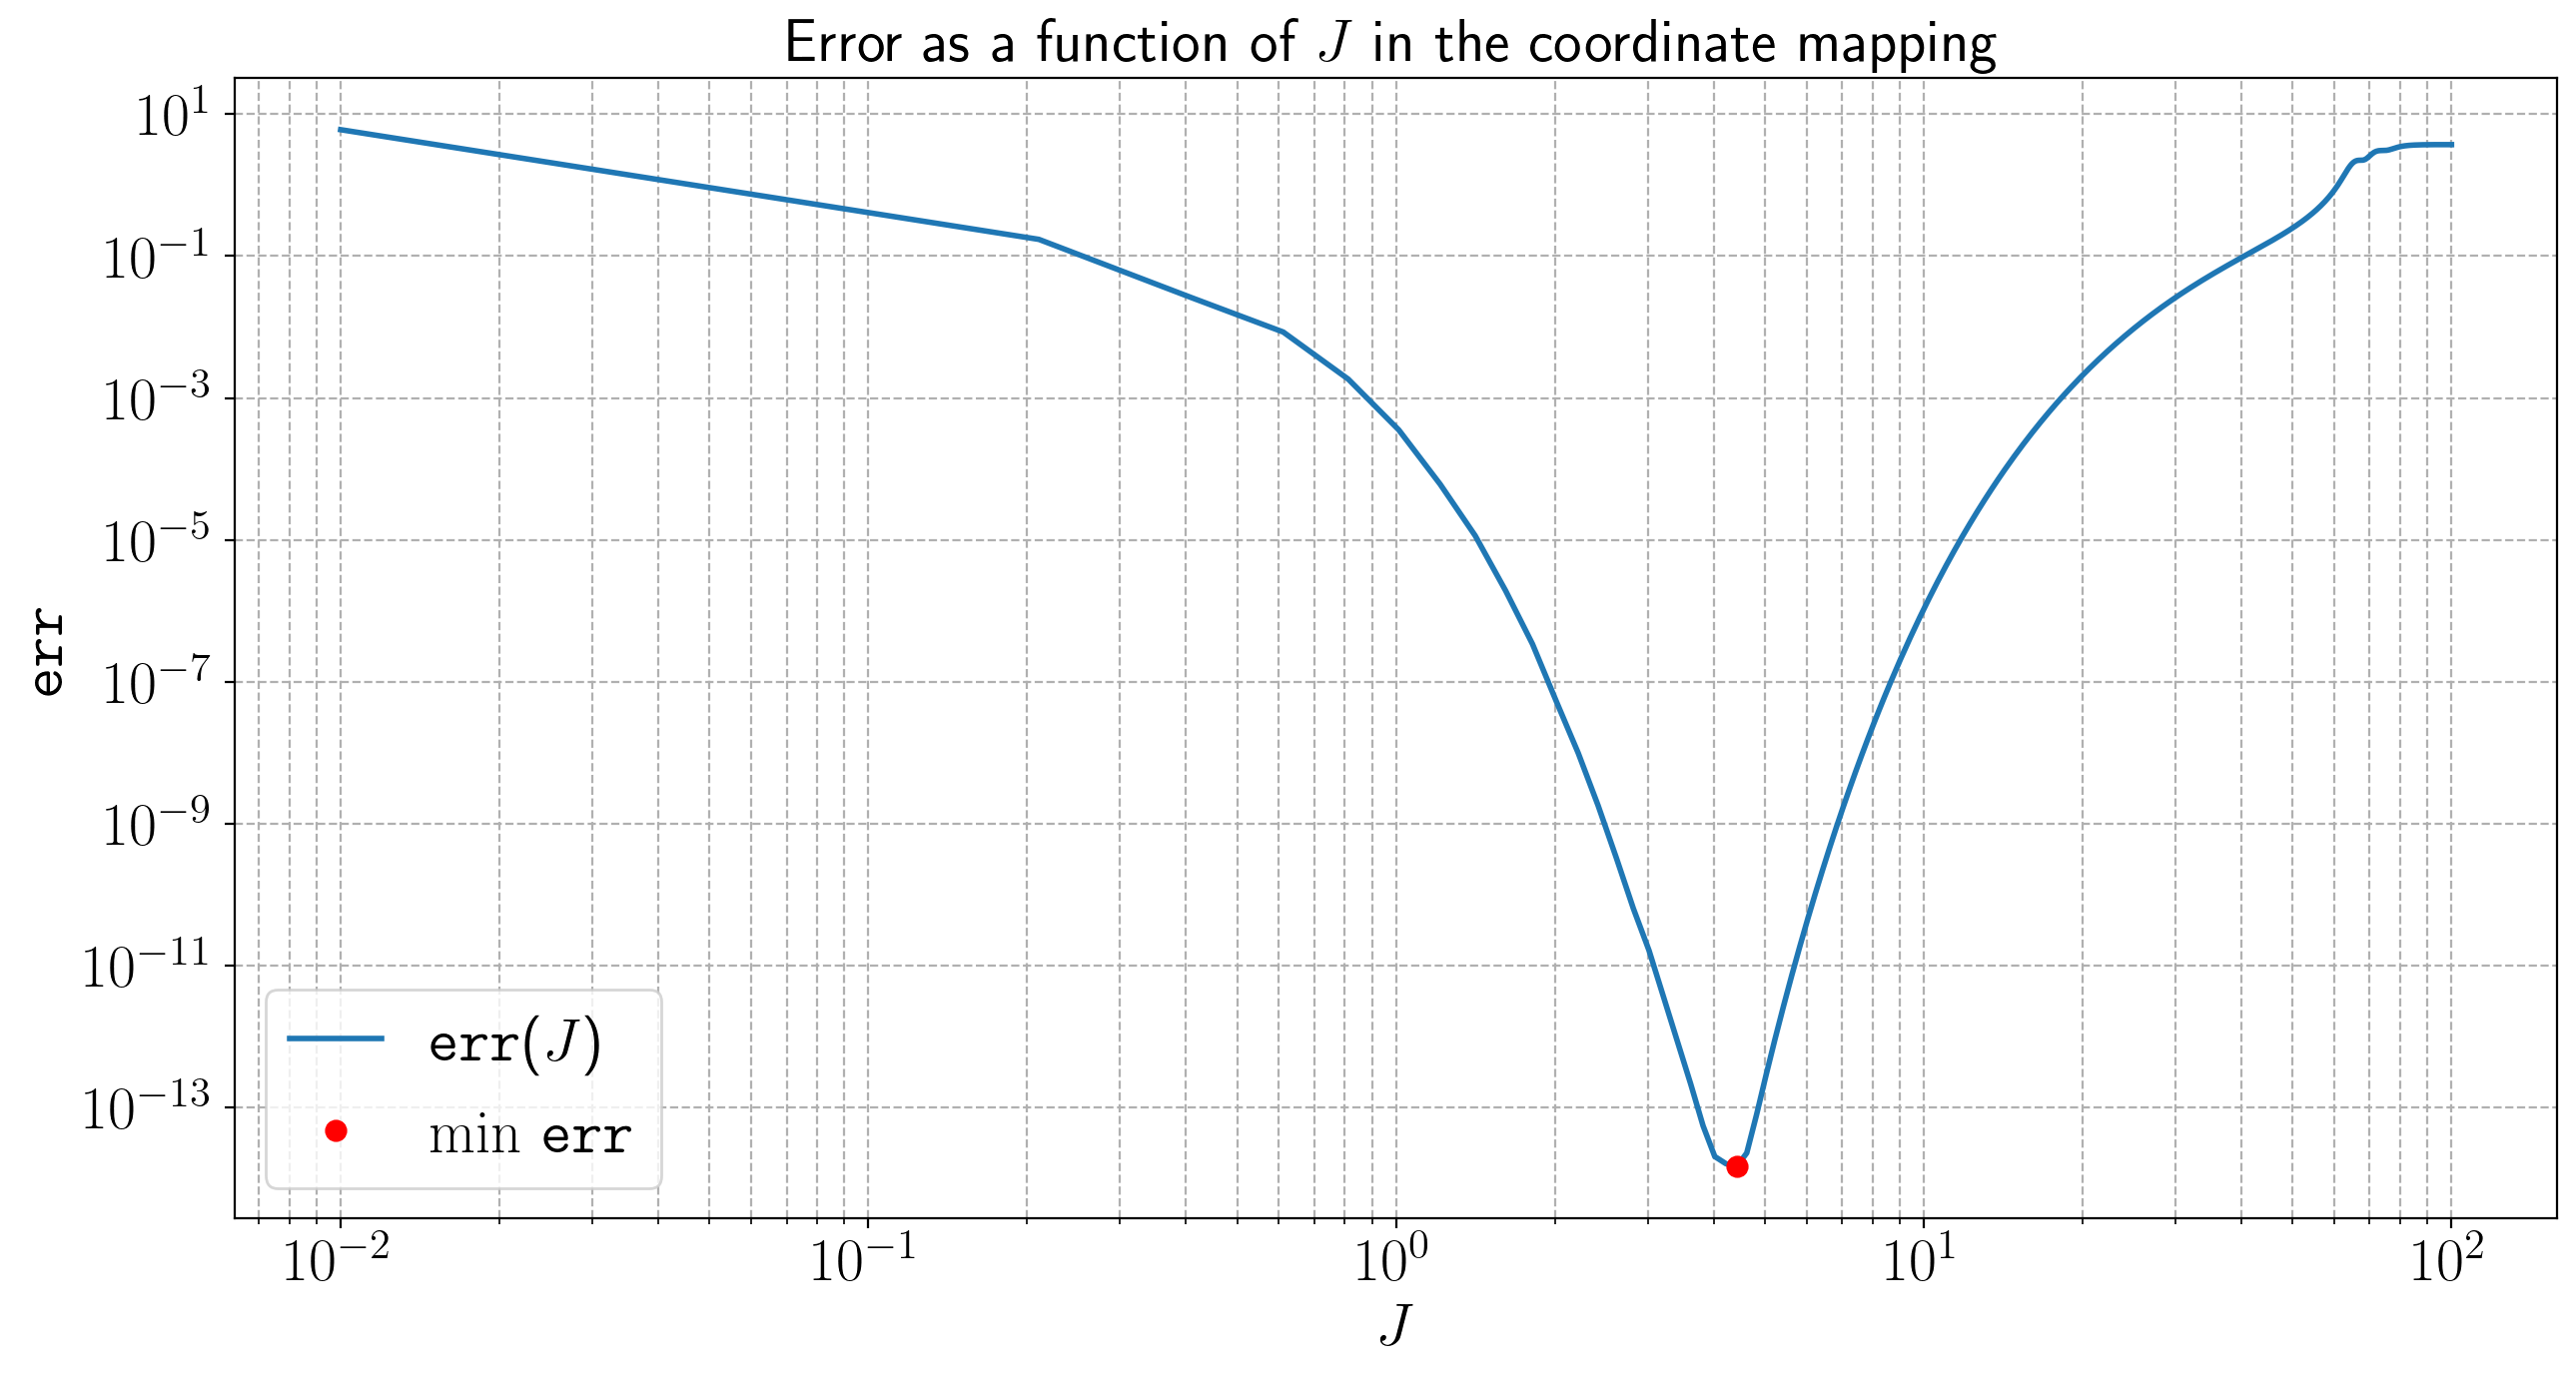

In [22]:
plt.title(r"Error as a function of $J$ in the coordinate mapping")

plt.plot(stats[:,0],stats[:,1],label=r"\texttt{err}($J$)")
plt.plot(best_J,best_diff,"ro",label=r"$\min$ \texttt{err}")

plt.yscale("log")
plt.xscale("log")

plt.ylabel(r"\texttt{err}")
plt.xlabel(r"$J$")

plt.grid(True, which="both", ls="--")

plt.legend()
plt.tight_layout()

## Analytical expression for short times 

When considering short times after the initial perturbation, we are in fact able to derive an analytical expression for the time evolution of the free fluid surface. Our starting point is the general expression 

\begin{equation}
\eta(x,t) = \int_{-\infty}^{\infty} \frac{dk}{\sqrt{2\pi}} aL\exp{\left(-\frac{k^2L^2}{2}\right)} \cos{\omega(k) t}\exp{(ikx)}.
\end{equation}

We start off by assuming that the water is <em>deep</em>, that is, $\omega(k) = \sqrt{g |k|}$. In this case, we have

$$
\cos{\omega(k) t } = 1 - \frac{1}{2}  g|k| t^2 + \mathcal{O}(t^4).
$$

For the disturbance in question, we will have negligible contributions to the integral whenever $|k| \gtrsim \sqrt{2}/L$, since then the amplitude will be so small that it makes no odds to the value of the integral. Furthermore, if we consider times such that $\tau = t \sqrt{g/L} \ll 1$, we know that

$$
\sqrt{g|k|}t = \tau \sqrt{l|k|} \lesssim \sqrt{2} \tau \ll 1,
$$

hence we should be able to keep only the first two terms in the Taylor expansion for $\cos$ without introducing a significant error for short times. In this case, we have

\begin{align*}
\eta(x,t) &\approx \int_{-\infty}^{\infty} \frac{\text{d}k}{\sqrt{2\pi}} aL\exp{\left(-\frac{k^2L^2}{2}\right)}\exp{(ikx)} \left( 1 - \frac{1}{2} g |k|t^2 \right) \\
&= a  \exp{\left(-\frac{x^2}{2L^2}\right)} - \frac{aLgt^2}{2\sqrt{2\pi}} \int_{-\infty}^{\infty} \text{d}k |k| \exp{\left(-\frac{k^2L^2}{2}\right)}\exp{(ikx)} \\
\eta(\xi,\tau)&\approx a \bigg( \exp{\left(-\xi^2\right)} - \frac{\tau^2}{\sqrt{2\pi}} \left[ 1 - \sqrt{\pi} \xi \exp{\left(-\xi^2\right)} \text{erfi}(\xi)\right] \bigg),
\end{align*}

where we have expressed the second integral in terms of the imaginary error function $\text{erfi}(\cdot)$.

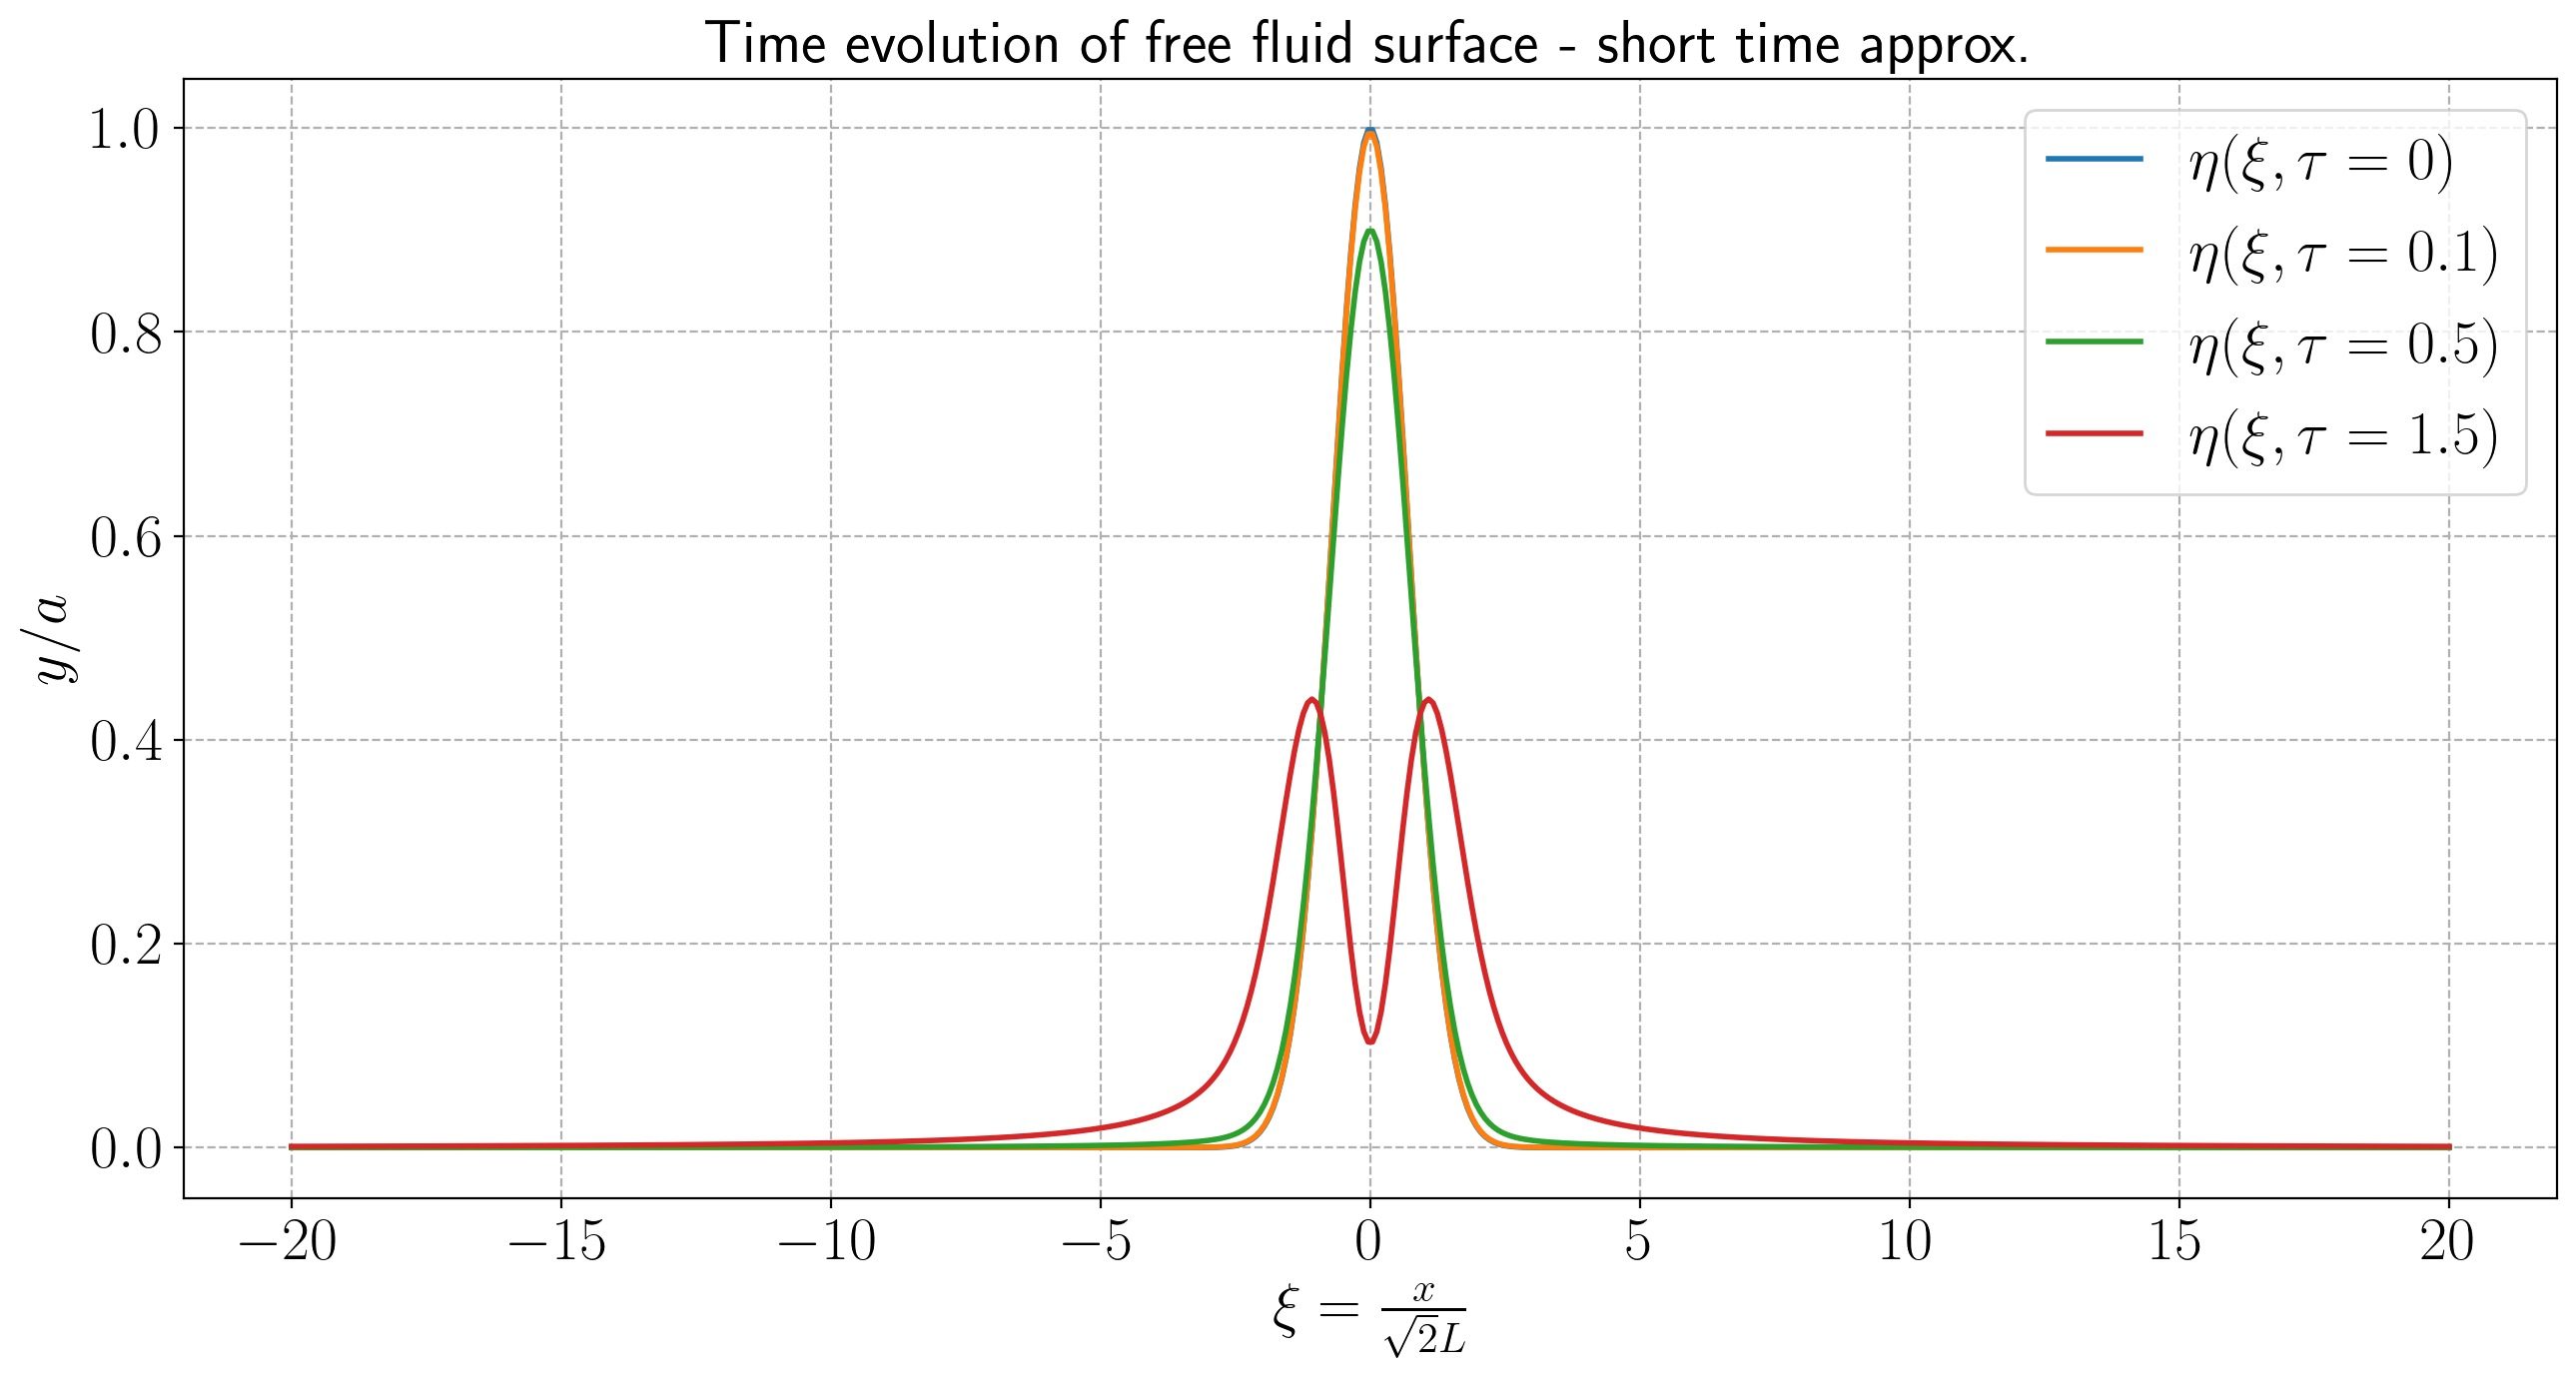

In [23]:
from scipy.special import erfi, dawsn

def eta_short_time(xi,tau):
    """
    Analytical expression for short-time approximation of eta(xi,tau)
    
    """
    
    return (np.exp(-xi**2) - tau**2*1/(np.sqrt(2*np.pi)) * (1 - np.sqrt(np.pi) * xi * np.exp(-xi**2) * erfi(xi)))

Y1 = eta_short_time(X,0)
Y2 = eta_short_time(X,0.1)
Y3 = eta_short_time(X,0.5)
Y4 = eta_short_time(X,1.5)

Ys = np.array([np.real(Y1),np.real(Y2),np.real(Y3),np.real(Y4)])

plot_waves(X, Ys, title = r"Time evolution of free fluid surface - short time approx.",
           labels = [r"$\eta(\xi,\tau = 0)$",r"$\eta(\xi,\tau = 0.1)$",r"$\eta(\xi,\tau = 0.5)$",r"$\eta(\xi,\tau = 1.5)$"])

In [24]:
from scipy.stats import linregress
from mpltools import annotation  # The special package mpltools may need to be installed

def slope_log(X,Y):
    """
    Function for getting the approximate slope of the linear regression
    done on set of points (log(X),log(Y))
    
    Args:
        X (np.array) : x-values
        Y (np.array) : y-values
        
    Returns:
        slope (float) : a in expression log(y) = a * log(x) + b
    """
    slope, intercept, r_value, p_value, std_err = linregress(np.log(X),np.log(Y))
    return slope


def short_time_approx(X,T):
    """
    Function for comparing the short-time approximation with
    the 'exact' numerical plot. Plots the deviation between the two 
    at time-values in a given array.
    
    Args:
        T (np.array) : tau values to evaluate eta at 
        X (np.array) : xi-values to evaluate eta at
        
    """
    
    N_correct = np.array([eta_exact_good(X,t,J=best_J) for t in T])
    N_approx  = np.array([eta_short_time(X,t) for t in T])
    
    errs = np.array([np.linalg.norm(N_correct[i,:] - N_approx[i,:]) for i in range(len(T))])
    
    fig, ax = plt.subplots()
    
    plt.title(r"Error as function of $\tau$ from short time approximation")
    ax.plot(T,errs)
    
    plt.grid(ls="--")
    
    ax.set_xlabel(r"$\tau$")
    ax.set_ylabel(r"$\texttt{err}$")
    
    # Making a slope marker in the plot. More examples on how it's used can be found here:
    # http://tonysyu.github.io/mpltools/auto_examples/annotation/plot_slope_marker.html
    
    half_size = int(1/2 * np.size(errs)) # using only the upper half of the values
    
    slope = round(slope_log(T[half_size:],errs[half_size:]),3)
    
    ax.set_yscale("log")
    ax.set_xscale("log")
    
    annotation.slope_marker((1,1), (slope,1), invert=True, 
                        ax=ax,text_kwargs={"fontsize" : fontsize})
    
    plt.tight_layout()
    plt.show()

ModuleNotFoundError: No module named 'mpltools'

In [ ]:
T = np.logspace(-3,np.log(2),500)

short_time_approx(X,T)

As expected, the error increases with increasing $\tau$. Moreover, by plotting it this way in a $\texttt{log-log}$-plot, we can see that we roughly have an error $\mathcal{O}(\tau^4)$, which is what we would expect from our truncation of $\cos$.

## Visualisation of different dispersion relations

Now that we have a method for determining the time evolution of the free fluid surface, it would be interesting to visualise how different dispersion relations affect the qualitative behaviour of the wave. We will look at gravity waves, capillary waves and waves with linear dispersion

In [ ]:
# Function for animating waves in matplotlib: 
# Not relevant for anything else than visualisation purposes

import matplotlib
import matplotlib.animation
from IPython.display import HTML, clear_output

def animate_wave(x, wave0, fps,wave_func,title, t1=0, t2=None, realtime=True):
    assert not (not realtime and t2 is None), "non-realtime animation must be finite in time"
    
    dt = 1 / fps
    nframes = None if t2 is None else int((t2 - t1) / dt) # None animates forever
    
    nframesstr = "infinite" if t2 is None else f"{nframes}"
    durationstr = "infinite" if t2 is None else f"{t2-t1:.2f}"
    print("Animation information:")
    print(f"  Frames   : {nframesstr}")
    print(f"  Framerate: {fps} FPS")
    print(f"  Duration : {durationstr}")
    print(f"  Time step: {dt}")
    
    fig, ax = plt.subplots()
    
    ax.set_title(title)
    ax.set_xlabel(r"$\xi $")
    ax.set_ylabel(r"$\eta(\xi,t)$")
    ax.set_ylim(-1,1.5)
    ax.set_xlim(np.min(x),np.max(x))
    
    #plt.grid()
    ymax = max(np.max(np.abs(wave0)**2), np.max(np.abs(wave0)))
    graph2, = ax.plot([x[0], x[-1]], [0, -2*ymax]) # make room for negative values

    def animate(i):
        time = t1 + i*dt
        wave = wave_func(x, time)
        
        # set_data() etc. modifies existing an existing object in a figure
        # it is much more efficient than creating a new figure for every animation frame
        graph2.set_data(x, np.real(wave))
        graph2.set_color("blue")
        
        ax.collections.clear() # clears the fill_between from the previous instant
        ax.fill_between(x, -np.ones(np.shape(np.real(wave))), np.real(wave),color="blue",alpha=0.9)
           
    ani = matplotlib.animation.FuncAnimation(fig, animate, frames=nframes, interval=dt*1000, repeat=False)

    plt.close()
    
    if realtime:
        return ani
    else:
        return HTML(ani.to_jshtml())

In [ ]:
T   = 100   # Surface tension - choosing an artificially large number to see the effect of the capilliary forces
rho = 997   # Density of water 

def omega_cap(k):
    """
    Dispersion relation for capillary waves 
    
    """
    return np.sqrt((g*k + T*k**3/rho)*np.tanh(h*k))

def omega_linear(k):
    """
    Linear dispersion relation 
    
    """
    return np.sqrt(g*h) * k

In [ ]:
best_J_cap, _, _ = search_optimal_J(J,X,3,omega = omega_cap) # finding a good J for capillary waves 
best_J_lin, _, _ = search_optimal_J(J,X,3,omega = omega_linear) # finding a good J for linear dispersive waves 

In [ ]:
def eta_grav(xi,t):
    return eta_exact_good(xi,t/t_0,J = best_J ,N = 1000, omega = omega_grav)

def eta_cap(xi,t):
    return eta_exact_good(xi ,t/t_0,J = best_J_cap ,N = 1000, omega = omega_cap)

def eta_linear(xi,t):
    return eta_exact_good(xi,t/t_0,J = best_J_lin ,N = 1000, omega = omega_linear)

Let us start by animating the simplest wave, namely a wave with a linear dispersion relation, also known as non-dispersive waves.

In [ ]:
L = 0.5
h = 0.05

wave_0 = f(X)

animate_wave(X,wave_0, 10, eta_linear,r"\textbf{Wave with linear dispersion}", t2=5, realtime=False)

The initial wave splits in two separate waves, with equal group velocity, but in opposite directions. Furthermore, we observe that the amplitude of the two wave-packets are half the amplitude of the initial wave. Now we can use our machinery to its full extent by studying gravity driven waves at shallow waters. Recall that they have approximately linear dispersion ($\tanh{kh} \approx kh$ for small $kh$), so we expect their behavior to be similar, but not entirely identical. 

Using the expression in \eqref{eq:eta2} together with the approximate dispersion relation obtained for $kh \ll 1$, one can easily show that the initial wave indeed splits into two new waves going in each direction with half the amplitude of the initial wave. This is left as an exercise for the reader.

Using our numerical approach, we can study the approximations made and - more importantly - observe what changes when the assumptions start to fail (eg. what happens if $kh \lesssim 1$ rather than $kh \ll 1$).

In [ ]:
# Gravity wave on shallow water
h = 0.05
animate_wave(X,wave_0, 10, eta_grav,r"\textbf{Gravity wave on shallow water}", t2=5, realtime=False)

It is difficult to see the difference in these two cases, but by further studying numerically how the error propagates, we are likely to find the effects from the higher order terms in $\tanh{kh}$. Check this out for yourself! 

The motion of a wave with linear dispersion resembles fairly well how a tsunami moves on shallow water, but only at a considerably large distance from the shore. When the tsunami eventually breaks, all the theory we have developed breaks down, since the entire framework depends on the assumption that the free fluid surface can be described by a _function_ $y=\eta(x,t)$, which certainly does not apply to a breaking wave! 

(Aside: the linear wave theory actually breaks down _long_ before the wave breaks. This is when the "steepness" $s = ka$, where $a$ is the amplitude, of the wave becomes considerably larger than unity. However, the point at which the surface $\eta(x,t)$ becomes ill-defined is in a sense more alarming since it rules out the first assumption we make!)

Now, let's study the difference between gravity waves in deeper waters, and capillary waves.

In [ ]:
h = 10 # Deeper waters
animate_wave(X,wave_0, 10, eta_grav,r"\textbf{Gravity wave}", t2=5, realtime=False)

A capillary wave shows completely different characteristics than the gravity driven wave, as long as we are in the regime where the capillary forces are dominant. This is when we have short wave lengths, so to see these effects, we make the initial wave narrower. In addition to this, we adjust the surface tension coefficient to an artificially large value such that the differences are more pronounced.

In [ ]:
L = 0.1                       # Making initial wave narrower
X = np.linspace(-10,10,1000)  # Choosing a finer grid for the narrow wave 

wave_0_cap = f(X)
animate_wave(X,wave_0_cap, 10, eta_cap,r"\textbf{Capillary wave}", t2=4, realtime=False)

Compare the characteristics of the capillary wave at large times with the capillary wave on the left hand side in the image above. Linear wave theory isn't _that_ bad after all!

# Appendix

## Derivation of governing equations for stokes waves 

(This derivation is a slightly adapted version of what is found in [[2]](#linearwaves))

We consider the case of 2D flow for simplicity. Let the mean water depth be $h$, and assume that the surface can be written as a function 

$$
y = \eta(x,t).
$$

In the linear wave theory we assume the wave motion to be a small perturbation proportional to the dimensionless quantity $s = ka$, where $a$ is the amplitude and $k$ the wave number. We neglect all terms $\mathcal{O}(s^2)$.

In the absence of waves, the velocity is zero everywhere, so that the equilibrium pressure is equal to the hydrostatic pressure $p_{eq}(y) = p_{\text{atm}} - \rho g y$.The total pressure is therefore given by 

$$
P(x,y,t) = p_{\text{atm}} - \rho g y + p(x,y,t),
$$

where $p$ is a small perturbation of the pressure field of order $s$, due to the presence of the waves.

Inviscid flow is governed by the Euler equations. They read in 2D,

\begin{align}\label{eq:pressure1}
	\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} &= - \frac{1}{\rho} \frac{\partial P}{\partial x} \\
	\label{eq:pressure2}
	\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} &= - \frac{1}{\rho} \frac{\partial P}{\partial y} - g. 
\end{align} 

The velocity field is $\mathbf{u}(x,y,t) = u(x,y,t) \mathbf{i} + v(x,y,t)\mathbf{j}$. In addition, we assume the fluid to be incompressible, which gives the equation of continuity as 

\begin{equation}
	\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0.
\end{equation}

Now, $u,v,p$ are all of order $s$, so we can ignore the second order terms in equations \eqref{eq:pressure1} and \eqref{eq:pressure2} to obtain

\begin{align}
	\dot{u} &= - \frac{1}{\rho} \frac{\partial p}{\partial x} \\
	\dot{v} &= - \frac{1}{\rho} \frac{\partial p}{\partial y} 
\end{align}

We differentiate these two equations with respect to $y$ and $x$ respectively to obtain 

$$
-\frac{1}{\rho} \frac{\partial^2 p}{\partial x \partial y} = \frac{\partial \dot{u}}{\partial y} = \frac{\partial \dot{v}}{\partial x},
$$

or in other words

$$
\frac{\partial}{\partial t} \left( \frac{\partial u}{\partial x} - \frac{\partial v}{\partial y} \right) = 0.
$$

But, we recognise the quantity in the parentheses as the vorticity, so this equation simply implies that the vorticity is everywhere constant in time. Having seen waves before, we know a bit about the kind of solution to expect, namely solutions which are not stationary but periodic in time, and so we may conjecture that if a time-periodic solution has constant vorticity, and since there is no vorticity when the wave amplitude is zero (i.e., still water), this
most likely means that vorticity is in fact zero with the waves present as well. Indeed, in the linearised case with no background flow this turns out to be true. In this case we know that we can simplify proceedings somewhat by introducing the velocity potential; $\mathbf{u} = \nabla \phi$.

### Governing equation for $\phi$

The continuity equation for such irrotational flow, gives the governing equation for the velocity potential,

$$
\nabla^2 \phi = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0.
$$

### Boundary conditions

The simplest boundary condition is that no water can pass through the bottom, i.e.,

$$
\frac{\partial \phi}{\partial y}\biggr\lvert_{y= - h} = 0,
$$

which is called the impermeability condition.

Two further boundary conditions are required, and they both refer to the free surface. To derive what is known as the <em>kinematic boundary condition</em>, it is convenient to define the surface function $F(x,y,t)$ as 

$$
F(x,y,t) = y - \eta(x,t).
$$

The surface itself is defined implicitly by $F(x,y,t) = 0$. If at the location of a fluid particle this is the case (ie. it is on the surface), it will <em>remain</em> the case. This simply states that a fluid particle which at some point is at the free surface will always stay on the surface while it is advected with the flow. Remember that the substantial derivative $\text{D}/\text{D}t = \partial/\partial t + \mathbf{u} \cdot \nabla$ is the change as seen from a particle in the fluid moving with the flow. So, from the point of view of a surface fluid particle, $F$ does not change its value from $0$,

\begin{equation}
    \frac{\text{D} F}{\text{D}t} = 0 \quad ; \quad y = \eta.
\end{equation}

Explicitly,

$$
\left( \frac{\partial}{\partial t} + u \frac{\partial}{\partial x} + v \frac{\partial }{\partial y} \right) \left[ y - \eta(x,t) \right] = - \dot{\eta} - u\frac{\partial \eta}{\partial x} + v = 0 \quad ; \quad y = \eta,
$$

which upon linearisation reduces to 

\begin{equation}\label{eq:kin_1}
    \dot{\eta} = v \quad ; \quad y = \eta.
\end{equation}  

A serious complication with the boundary condition \eqref{eq:kin_1} remains because it is evaluated at the point $y = \eta$, but $\eta(x, t)$ is itself unknown! Linearisation takes care of this, because it does not matter to linear order whether the condition is taken at $y = \eta$ or at $y = 0$. Therefore, we obtain the kinematic boundary condition as 

\begin{equation}\label{eq:kin}
    \dot{\eta} = v = \frac{\partial \phi}{\partial y} \quad ; \quad y = 0.
\end{equation}

The final boundary condition is called the dynamic boundary condition. The basic physics behind this condition is the recognition that all stresses in any fluid system must be continuous functions, so also at the surface. If the forces on surface particles were not continuous, finite forces would act on infinitesimal fluid elements, resulting in infinite acceleration. In the absence of viscosity, $\mu = 0$, the continuity of stress normal to the surface simply reduces to the statement that the pressure just above the surface must equal the atmospheric pressure, and the components parallel to the surface give trivial equations since the tangential stress has only viscous components.

In general, when the surface is curved, surface tension will cause a step discontinuity of pressure across the surface, but we will ignore this here. The remaining dynamic boundary condition is simply that pressure must be continuous across the interface. In other words, the pressure directly beneath the water surface must be atmospheric. Now the pressure above the surface is a constant (the atmospheric pressure), and the pressure below the surface is described by Bernoulli’s equation, that is 

$$
    \dot{\phi} + \nabla^2 \phi + gy + \frac{p}{\rho} = \text{constant},
$$

which upon linearisation at the fluid surface reduces to 

$$
    \dot{\phi} + g\eta + \frac{p_{\text{atm}}}{\rho} = \text{constant} \quad ; \quad y = 0
$$

Since this must hold also when the water is quiet $\phi = \eta = 0$, the constant must be $p_{\text{atm}}/\rho$ and we are left with the _linearised dynamic boundary condition_

\begin{equation}
    \dot{\phi} + g\eta = 0 \quad ; \quad y = 0.
\end{equation}

## Explicit expression for cardinal functions $C_j(\theta)$

(Consult [[1]](#fourier_quad) for details on this topic)

By combining only cosine functions (which is what we are interested in due to the symmetric integration domain) one can obtain the following cardinal function for the $N$ interpolation points $\left\lbrace t_i\right\rbrace_{i=0}^{N-1} = \left\lbrace \frac{i \pi}{N -1} \right\rbrace_{i = 0}^{N-1}$

\begin{align}
    C_j(\theta) &= \frac{2}{c_j (N-1)} \sum_{m=0}^{N-1} \cos{m t_j} \frac{\cos{m\theta}}{c_m} \\ 
                &= (-1)^{j+1} \sin{(\theta)} \sin{[(N-1)\theta ]} \frac{1}{(N-1) [ \cos{(\theta)} - \cos{(t_j)} ]}
\end{align}

where

$$
c_j = \begin{cases}
2, j = 0 \text{ or } N-1 \\
1, 1 < j < N-1
\end{cases}.
$$

The first form of the cardinal function makes it clear that it in fact is a linear combination of cosines, while the second makes it clear that $C_j(t_i) = 0$ if $i\neq j$ and $1$ if $i = j$ (showing the case where $i=j$ is straight forward, but requires to consider a limit, eg. by using L'Hôpitals rule). 

We will not show the equivalence of the two formulas for the cardinal functions, but we compute the weights using the first representation.

\begin{align*}
w_j = \chi'(t_j) \int_{0}^{\pi} \text{d} \theta \frac{2}{c_j (N-1)} \sum_{m=0}^{N-1} \cos{m t_j} \frac{\cos{m\theta}}{c_m} 
    &= \chi'(t_j) \sum_{m=0}^{N-1} \frac{2}{c_jc_m (N-1)}  \cos{m t_j} \int_{0}^{\pi} \text{d}\theta \cos{(m\theta)} \\
    &= \chi'(t_j) \sum_{m=0}^{N-1} \frac{2}{c_jc_m (N-1)}  \cos{m t_j} \frac{\sin{m\pi}}{m} \\
    &= \chi'(t_j) \sum_{m=0}^{N-1} \frac{2}{c_jc_m (N-1)}  \cos{m t_j} \pi \delta_{m,0} \\
    &= \chi'(t_j) \frac{2\pi}{c_j c_0 (N-1)} \cos{(0)} = \chi' (t_j) \frac{\pi}{c_j (N-1)}
\end{align*}

Hence,

$$
w_j = \sin^{-2}\left({\frac{\pi j}{N-1}}\right) \cdot \begin{cases}
\frac{\pi}{N-1} , 0 < j < N-1 \\
\frac{\pi}{2(N-1)}, j = 0 \text{ or } j = N -1 
\end{cases}.
$$

# References: 

 <a name="fourier_quad">[1]</a> <em> Exponentially Convergent Fourier-Chebshev
Quadrature Schemes on Bounded and Infinite Intervals </em> (1987) Boyd, J. <a href="https://link.springer.com/article/10.1007/BF01061480">Article</a>

 <a name="linearwaves">[2]</a> <em> Linear surface waves </em> (2019) Ellingsen, S.  

A qualitative feature to note from comparing the gravity wave with the capillary wave, is that in the neighbourhood of the disturbance center, a region of still water more quickly emerges for the capillary waves. In addition to this, small ripples emerge at some distance from the disturbance center. This resembles what we are familiar with from small ripples on water caused by for example insects or droplets falling onto the surface.

<center>
    <img src="https://www.surfertoday.com/images/stories/capillarywaves.jpg" alt="Capillary waves">
</center>